<a href="https://colab.research.google.com/github/Aldow/Proyecto-end-to-end-autos-1985-/blob/main/Proyecto_end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de autos de 1985, predicción de precios

In [1]:
import pandas as pd 
!pip install --upgrade scikit-learn 

     |████████████████████████████████| 22.2MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


Importamos los datos que estan guardados como un csv, agregamos la r dado que los slash debiesen / para leerse o en su defecto 
\ \

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
datos=pd.read_csv("/content/drive/MyDrive/auto.csv",header=None)

In [4]:
datos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Los encabezados los tenemos guardados, así que por eso salen un poco de debajo de la manga:

In [5]:
encabezados=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
encabezados=["riesgo","perdidas_normalizadas","marca","tipo_combustible","aspiracion", "numero_puertas","estilo_cuerpo",
         "traccion","posicion_motor","distanciaentre_ejes", "largo","ancho","alto","peso_en_vacio","tipode_motor",
         "cantidad_cilindros", "tamaño_motor","sistema_combustible","diametro_cilindro","slargo_cilindro","razon_compresion","caballosdefuerza",
         "rpm_max","mpg_en_ciudad","mpg_en_carretera","precio"]
datos.columns=encabezados

In [6]:
datos.tail(10)

,riesgo,perdidas_normalizadas,marca,tipo_combustible,aspiracion,numero_puertas,estilo_cuerpo,traccion,posicion_motor,distanciaentre_ejes,largo,ancho,alto,peso_en_vacio,tipode_motor,cantidad_cilindros,tamaño_motor,sistema_combustible,diametro_cilindro,slargo_cilindro,razon_compresion,caballosdefuerza,rpm_max,mpg_en_ciudad,mpg_en_carretera,precio
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


Primero comprobaremos si existen NaN 

In [7]:
datos.isna().sum()

riesgo                   0
perdidas_normalizadas    0
marca                    0
tipo_combustible         0
aspiracion               0
numero_puertas           0
estilo_cuerpo            0
traccion                 0
posicion_motor           0
distanciaentre_ejes      0
largo                    0
ancho                    0
alto                     0
peso_en_vacio            0
tipode_motor             0
cantidad_cilindros       0
tamaño_motor             0
sistema_combustible      0
diametro_cilindro        0
slargo_cilindro          0
razon_compresion         0
caballosdefuerza         0
rpm_max                  0
mpg_en_ciudad            0
mpg_en_carretera         0
precio                   0
dtype: int64

In [8]:
datos.isnull().sum()

riesgo                   0
perdidas_normalizadas    0
marca                    0
tipo_combustible         0
aspiracion               0
numero_puertas           0
estilo_cuerpo            0
traccion                 0
posicion_motor           0
distanciaentre_ejes      0
largo                    0
ancho                    0
alto                     0
peso_en_vacio            0
tipode_motor             0
cantidad_cilindros       0
tamaño_motor             0
sistema_combustible      0
diametro_cilindro        0
slargo_cilindro          0
razon_compresion         0
caballosdefuerza         0
rpm_max                  0
mpg_en_ciudad            0
mpg_en_carretera         0
precio                   0
dtype: int64

In [9]:
datos.dtypes

riesgo                     int64
perdidas_normalizadas     object
marca                     object
tipo_combustible          object
aspiracion                object
numero_puertas            object
estilo_cuerpo             object
traccion                  object
posicion_motor            object
distanciaentre_ejes      float64
largo                    float64
ancho                    float64
alto                     float64
peso_en_vacio              int64
tipode_motor              object
cantidad_cilindros        object
tamaño_motor               int64
sistema_combustible       object
diametro_cilindro         object
slargo_cilindro           object
razon_compresion         float64
caballosdefuerza          object
rpm_max                   object
mpg_en_ciudad              int64
mpg_en_carretera           int64
precio                    object
dtype: object

Es necesario cambiar el tipo de algunas variables dado que las lanza como object y son realmente numericos (continuos o no ), las columnas que al parecer debiesen ser cambiadas son *perdidas_normalizadas, numero de puertas,cantidad de cilindros , caballos de fuerza, rpm max y el objetivo precio* 

Hay que tener cuidado con los ? en algunas posiciones de la columna perdidas_normalizadas

In [10]:
(datos["perdidas_normalizadas"].str.find("?")==0).sum()

41

Aparentemente existen 41 ? en la columna perdidas normalizadas 


In [11]:
import numpy as np
datos=datos.replace("?", np.nan)

In [12]:
datos.numero_puertas.unique()

array(['two', 'four', nan], dtype=object)

In [13]:
datos[['numero_puertas']]=datos.numero_puertas.replace(to_replace=['two','four'],value=[2,4])

In [14]:
datos.numero_puertas

0      2.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
200    4.0
201    4.0
202    4.0
203    4.0
204    4.0
Name: numero_puertas, Length: 205, dtype: float64

In [15]:
datos.cantidad_cilindros.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [16]:
datos[['cantidad_cilindros']]=datos.cantidad_cilindros.replace(to_replace=['four','six','five','three','twelve','two','eight'],
                                      value=[4,6,5,3,12,2,8])

In [17]:
datos.cantidad_cilindros

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cantidad_cilindros, Length: 205, dtype: int64

In [18]:
datos.select_dtypes(include=['int64','float64']).isna().sum()

riesgo                 0
numero_puertas         2
distanciaentre_ejes    0
largo                  0
ancho                  0
alto                   0
peso_en_vacio          0
cantidad_cilindros     0
tamaño_motor           0
razon_compresion       0
mpg_en_ciudad          0
mpg_en_carretera       0
dtype: int64

In [19]:
mediana_cilindros=datos.numero_puertas.median()
datos[['numero_puertas']]=datos[['numero_puertas']].fillna(value=mediana_cilindros,axis=1)

In [20]:
datos.astype({'numero_puertas':'int64'})

,riesgo,perdidas_normalizadas,marca,tipo_combustible,aspiracion,numero_puertas,estilo_cuerpo,traccion,posicion_motor,distanciaentre_ejes,largo,ancho,alto,peso_en_vacio,tipode_motor,cantidad_cilindros,tamaño_motor,sistema_combustible,diametro_cilindro,slargo_cilindro,razon_compresion,caballosdefuerza,rpm_max,mpg_en_ciudad,mpg_en_carretera,precio
0,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [21]:
datos=datos.astype({'perdidas_normalizadas':'float64'})
datos[['perdidas_normalizadas']]=datos[['perdidas_normalizadas']].fillna(value=datos.perdidas_normalizadas.median(),axis=1)
datos.select_dtypes(include=['int64','float64']).isna().sum()
datos=datos.astype({'perdidas_normalizadas':'int64','numero_puertas':'int64'})
datos.dtypes

riesgo                     int64
perdidas_normalizadas      int64
marca                     object
tipo_combustible          object
aspiracion                object
numero_puertas             int64
estilo_cuerpo             object
traccion                  object
posicion_motor            object
distanciaentre_ejes      float64
largo                    float64
ancho                    float64
alto                     float64
peso_en_vacio              int64
tipode_motor              object
cantidad_cilindros         int64
tamaño_motor               int64
sistema_combustible       object
diametro_cilindro         object
slargo_cilindro           object
razon_compresion         float64
caballosdefuerza          object
rpm_max                   object
mpg_en_ciudad              int64
mpg_en_carretera           int64
precio                    object
dtype: object

In [22]:
datos=datos.astype({'caballosdefuerza':'float64','rpm_max':'float64'})
datos[['caballosdefuerza']]=datos[['caballosdefuerza']].fillna(value=datos.caballosdefuerza.median(),axis=1)
datos[['rpm_max']]=datos[['rpm_max']].fillna(value=datos.rpm_max.median(),axis=1)
datos=datos.astype({'caballosdefuerza':'int64','rpm_max':'int64','precio':'float64'})

In [23]:
datos.dtypes

riesgo                     int64
perdidas_normalizadas      int64
marca                     object
tipo_combustible          object
aspiracion                object
numero_puertas             int64
estilo_cuerpo             object
traccion                  object
posicion_motor            object
distanciaentre_ejes      float64
largo                    float64
ancho                    float64
alto                     float64
peso_en_vacio              int64
tipode_motor              object
cantidad_cilindros         int64
tamaño_motor               int64
sistema_combustible       object
diametro_cilindro         object
slargo_cilindro           object
razon_compresion         float64
caballosdefuerza           int64
rpm_max                    int64
mpg_en_ciudad              int64
mpg_en_carretera           int64
precio                   float64
dtype: object

Podemos ver que convertimos perdidas_normalizadas, numero de puertas,cantidad de cilindros , caballos de fuerza, rpm max y el objetivo precio en variables float e int, donde se pueden analiza mejor

Comenzemos viendo la distribucion de la respuesta

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

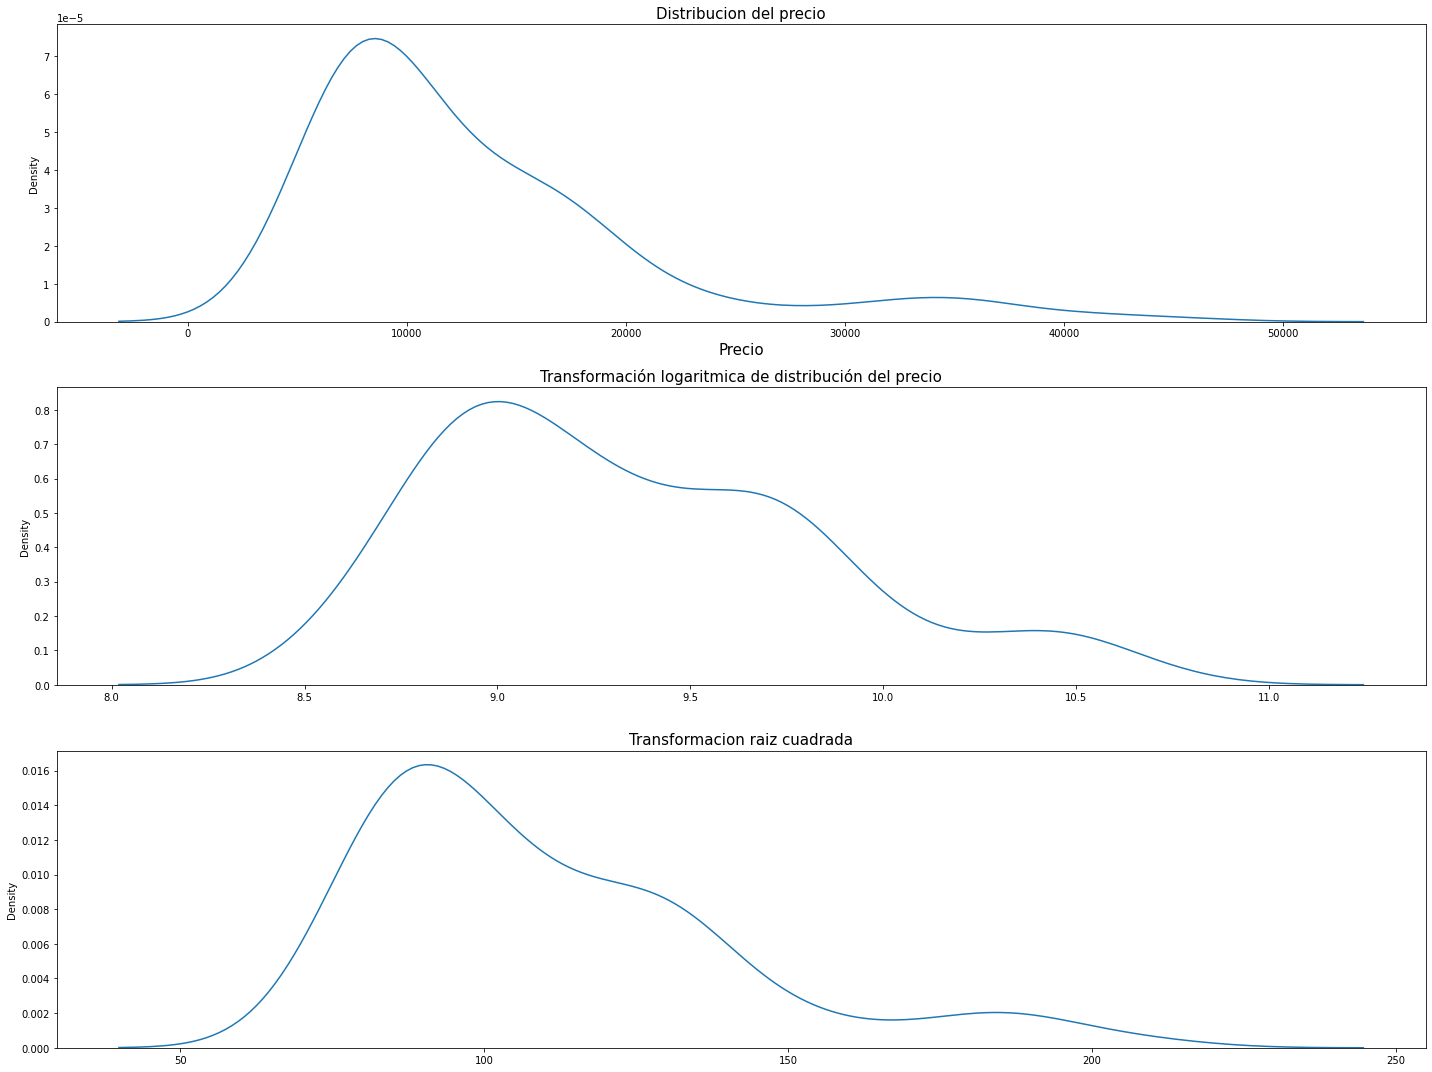

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes= plt.subplots(nrows=3, ncols=1,figsize=(20,15))

sns.distplot(x=datos.precio,
            hist=False,
            ax=axes[0])
axes[0].set_title('Distribucion del precio',fontsize=15)
axes[0].set_xlabel('Precio',fontsize=15)

sns.distplot(x=np.log(datos.precio),
             hist=False,
            ax=axes[1])
axes[1].set_title('Transformación logaritmica de distribución del precio', fontsize=15)

sns.distplot(x=np.sqrt(datos.precio),
            hist=False,
            ax=axes[2])
axes[2].set_title('Transformacion raiz cuadrada', fontsize=15)

plt.tight_layout()

In [25]:
!pip install fitter

     |████████████████████████████████| 51kB 4.5MB/s 
  Created wheel for fitter: filename=fitter-1.3.0-cp36-none-any.whl size=24743 sha256=7e6515a99d3bb42284830f0cc37d7c88dad100549427358c8be72acb5cee3b37
  Stored in directory: /root/.cache/pip/wheels/80/d8/0f/3dba85fa574e0e489ca900bb0055d3394c103ae46210d04945
  Created wheel for easydev: filename=easydev-0.10.1-cp36-none-any.whl size=68366 sha256=aef1d79f77bcc7d68fcb16dcf31d51fbaad9fc96032972e973f1b0528fc0e371
  Stored in directory: /root/.cache/pip/wheels/46/6d/c5/fc8db417188e230edbe9176d680873527aac7d1cdb48318855
Successfully built fitter easydev


Debimos instalar fitter pues google colab no lo tiene 

,sumsquare_error,aic,bic,kl_div
gamma,4.148574e-08,2312.913069,-4466.635487,inf
expon,4.568854e-08,2301.632231,-4452.542779,inf
cauchy,6.013273e-08,2415.039297,-4397.326709,inf
rayleigh,7.239718e-08,2403.530566,-4360.018469,inf
exponpow,7.376578e-08,2319.225314,-4350.950921,inf
norm,8.544214e-08,2429.687398,-4326.718393,inf
powerlaw,8.862690e-08,2147.665690,-4314.059281,inf
uniform,1.337767e-07,2124.732000,-4236.603541,inf
lognorm,1.753504e-07,2631.895686,-4176.906727,inf
chi2,1.954047e-07,323222.191208,-4155.141193,inf


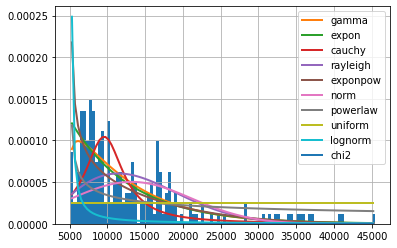

In [26]:
import fitter as fitter
from fitter import Fitter, get_common_distributions
distribuciones=get_common_distributions()
fitter_distribuciones=Fitter(datos.precio.dropna(),distributions=distribuciones)
fitter_distribuciones.fit()
fitter_distribuciones.summary(Nbest=10).sort_values(by='sumsquare_error')

In [27]:
datos.isna().sum()

riesgo                   0
perdidas_normalizadas    0
marca                    0
tipo_combustible         0
aspiracion               0
numero_puertas           0
estilo_cuerpo            0
traccion                 0
posicion_motor           0
distanciaentre_ejes      0
largo                    0
ancho                    0
alto                     0
peso_en_vacio            0
tipode_motor             0
cantidad_cilindros       0
tamaño_motor             0
sistema_combustible      0
diametro_cilindro        4
slargo_cilindro          4
razon_compresion         0
caballosdefuerza         0
rpm_max                  0
mpg_en_ciudad            0
mpg_en_carretera         0
precio                   4
dtype: int64

In [28]:
datos=datos.rename({'slargo_cilindro':'largo_cilindro'}, axis=1)

### Largo de cilindro y diametro de cilindro estan como object y debiesen ser float

In [29]:
datos.dtypes

riesgo                     int64
perdidas_normalizadas      int64
marca                     object
tipo_combustible          object
aspiracion                object
numero_puertas             int64
estilo_cuerpo             object
traccion                  object
posicion_motor            object
distanciaentre_ejes      float64
largo                    float64
ancho                    float64
alto                     float64
peso_en_vacio              int64
tipode_motor              object
cantidad_cilindros         int64
tamaño_motor               int64
sistema_combustible       object
diametro_cilindro         object
largo_cilindro            object
razon_compresion         float64
caballosdefuerza           int64
rpm_max                    int64
mpg_en_ciudad              int64
mpg_en_carretera           int64
precio                   float64
dtype: object

In [30]:
datos=datos.astype({'diametro_cilindro':'float64','largo_cilindro':'float64'})

In [31]:
datos.dtypes

riesgo                     int64
perdidas_normalizadas      int64
marca                     object
tipo_combustible          object
aspiracion                object
numero_puertas             int64
estilo_cuerpo             object
traccion                  object
posicion_motor            object
distanciaentre_ejes      float64
largo                    float64
ancho                    float64
alto                     float64
peso_en_vacio              int64
tipode_motor              object
cantidad_cilindros         int64
tamaño_motor               int64
sistema_combustible       object
diametro_cilindro        float64
largo_cilindro           float64
razon_compresion         float64
caballosdefuerza           int64
rpm_max                    int64
mpg_en_ciudad              int64
mpg_en_carretera           int64
precio                   float64
dtype: object

# análisis de los predictores

Trataremos de ver si alguno tiene una distribucion clara


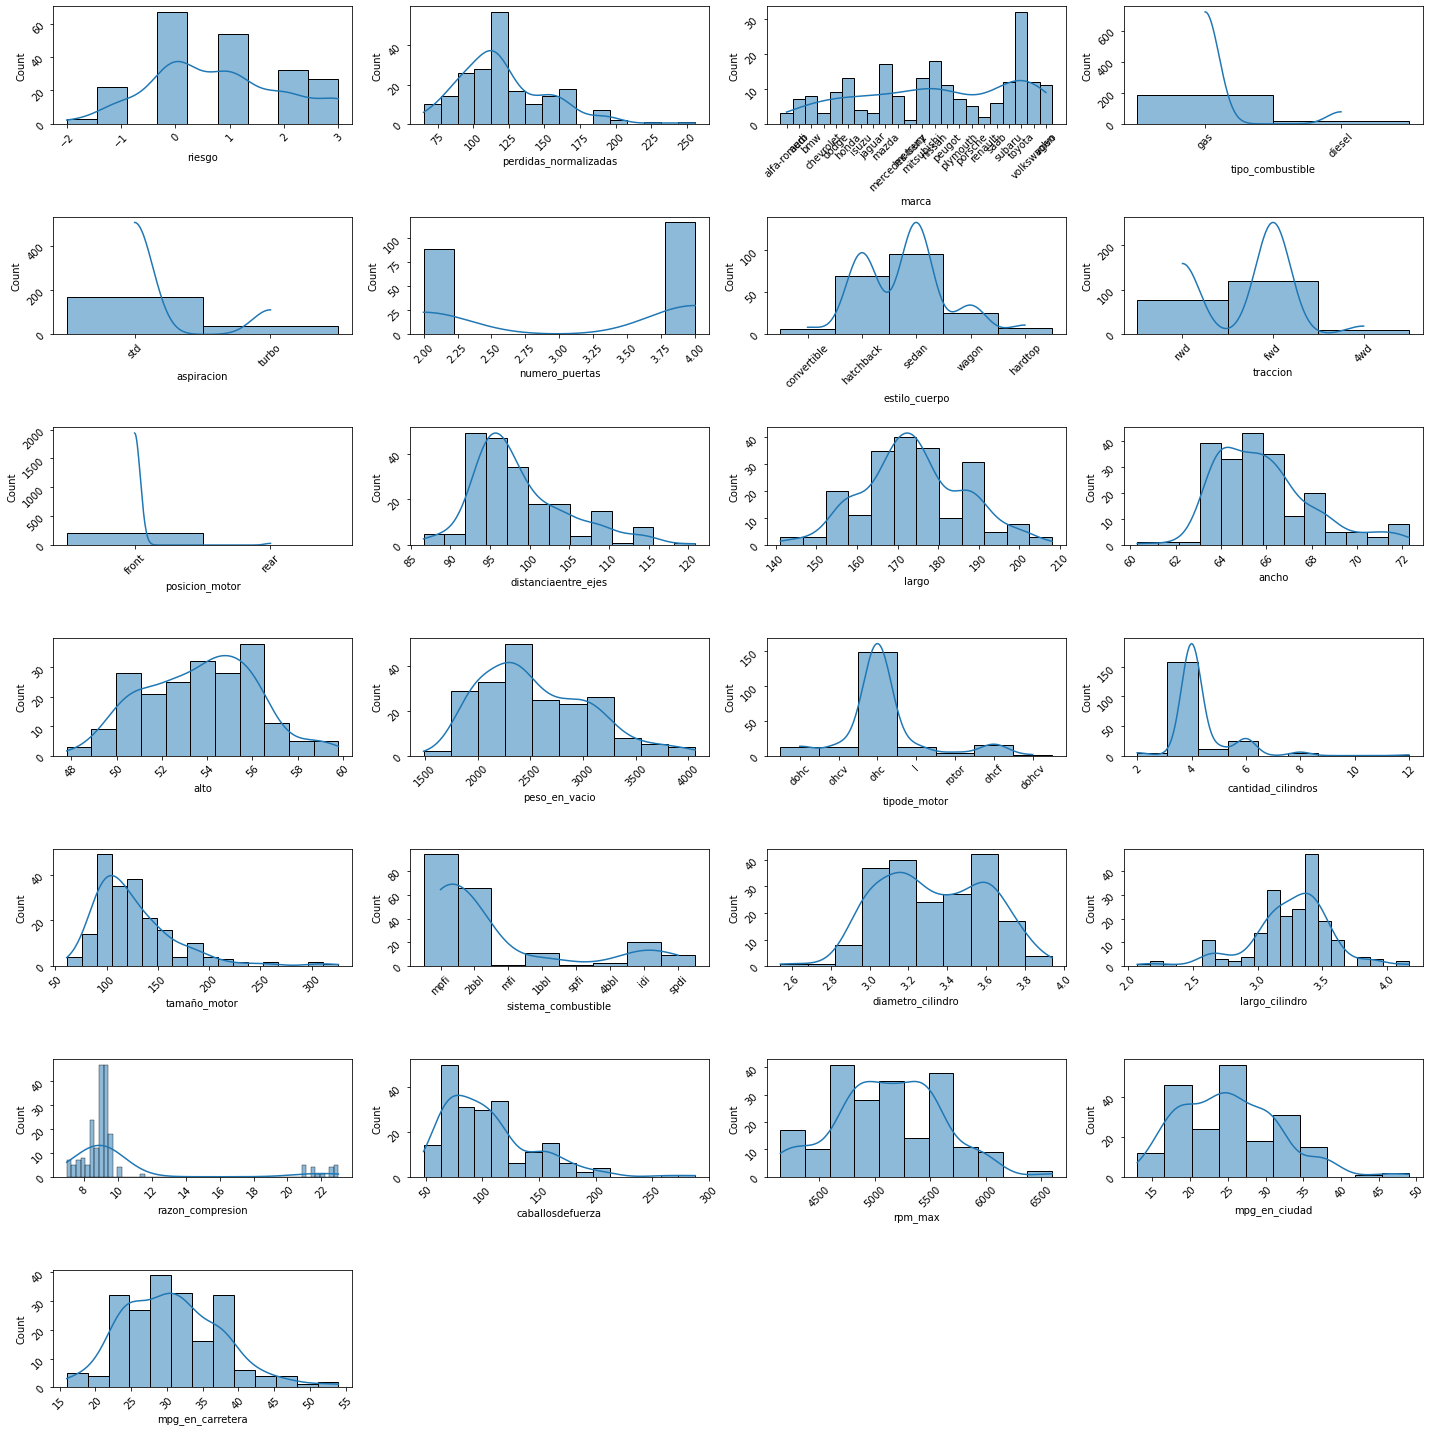

In [32]:
fig,axes= plt.subplots(nrows=7,ncols=4, figsize=(20,20))
axes=axes.flat

for i,columna in enumerate(datos.drop('precio',axis=1).columns):
    sns.histplot(data=datos,
                 x=columna,
                 kde=True,
                 ax=axes[i])
    
    axes[i].tick_params(rotation=45)
    
for borrar in range(25,28):
    fig.delaxes(axes[borrar])
    
plt.tight_layout()


# Relación predictores y respuesta

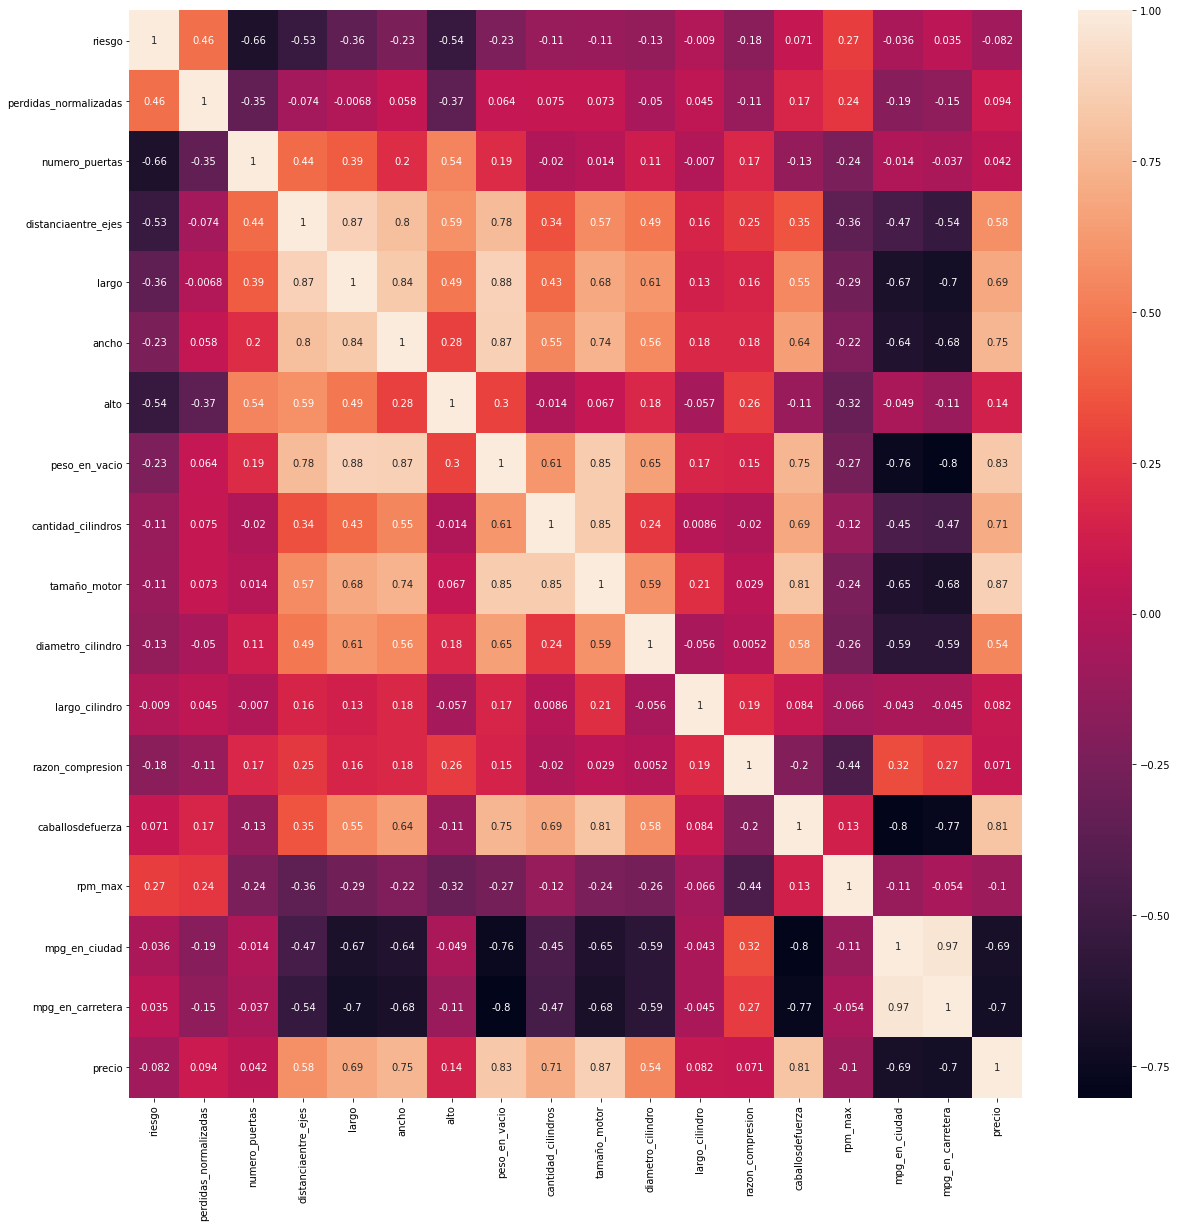

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(data=datos.corr(method='pearson'), annot=True)

Se notan fuerte correlaciones entre algunas variables, destaca principalmente la relacion precio tamaño de motor, peso y caballos de fuerza 

In [34]:
def matriz_correlacion(df):
    matriz=df.corr(method='pearson').stack().reset_index()
    matriz.columns=['variable_1','variable_2','r']
    matriz=matriz.loc[matriz['variable_1'] != matriz['variable_2']]
    matriz=matriz.sort_values(by='r',ascending=False)
    return matriz

In [35]:
matriz_correlacion(datos)

,variable_1,variable_2,r
303,mpg_en_carretera,mpg_en_ciudad,0.971337
286,mpg_en_ciudad,mpg_en_carretera,0.971337
130,peso_en_vacio,largo,0.877728
79,largo,peso_en_vacio,0.877728
75,largo,distanciaentre_ejes,0.874587
...,...,...,...
301,mpg_en_carretera,caballosdefuerza,-0.770780
142,peso_en_vacio,mpg_en_carretera,-0.797465
295,mpg_en_carretera,peso_en_vacio,-0.797465
249,caballosdefuerza,mpg_en_ciudad,-0.802170


In [36]:
#sns.pairplot(datos)

Se ve que existe una fuerte relación en algunas variables, analizaremos el VIF 


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def calcular_vif(df):
    df=add_constant(df)
    df=df.select_dtypes(include=['int64','float64'])
    vif=pd.DataFrame()
    vif['variables']=df.columns
    vif['VIF']=[variance_inflation_factor(df.dropna().values,i) for i in range(0,df.shape[1])]
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif
    
    
    

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [38]:
calcular_vif(datos.drop(['tamaño_motor',
                         'mpg_en_ciudad',
                         'peso_en_vacio',
                         'largo','caballosdefuerza',
                         'distanciaentre_ejes',
                         'precio'],axis=1))

,variables,VIF
0,const,4505.698290
11,mpg_en_carretera,3.598562
4,ancho,3.414408
1,riesgo,2.107283
7,diametro_cilindro,2.044959
6,cantidad_cilindros,2.026881
3,numero_puertas,1.940011
5,alto,1.904122
9,razon_compresion,1.796542
10,rpm_max,1.443376


Vemos que habia un problema de multicolinealidad (verlo con todas las variables, incluyendo las que borré pues eso lo hice para arreglarlo) no obstante se plantea crear un modelo, primero sin las variables con un VIF alto y luego con esas variables 


In [39]:
datos=datos.drop(['tamaño_motor',
                         'mpg_en_ciudad',
                         'peso_en_vacio',
                         'largo','caballosdefuerza',
                         'distanciaentre_ejes'],axis=1)

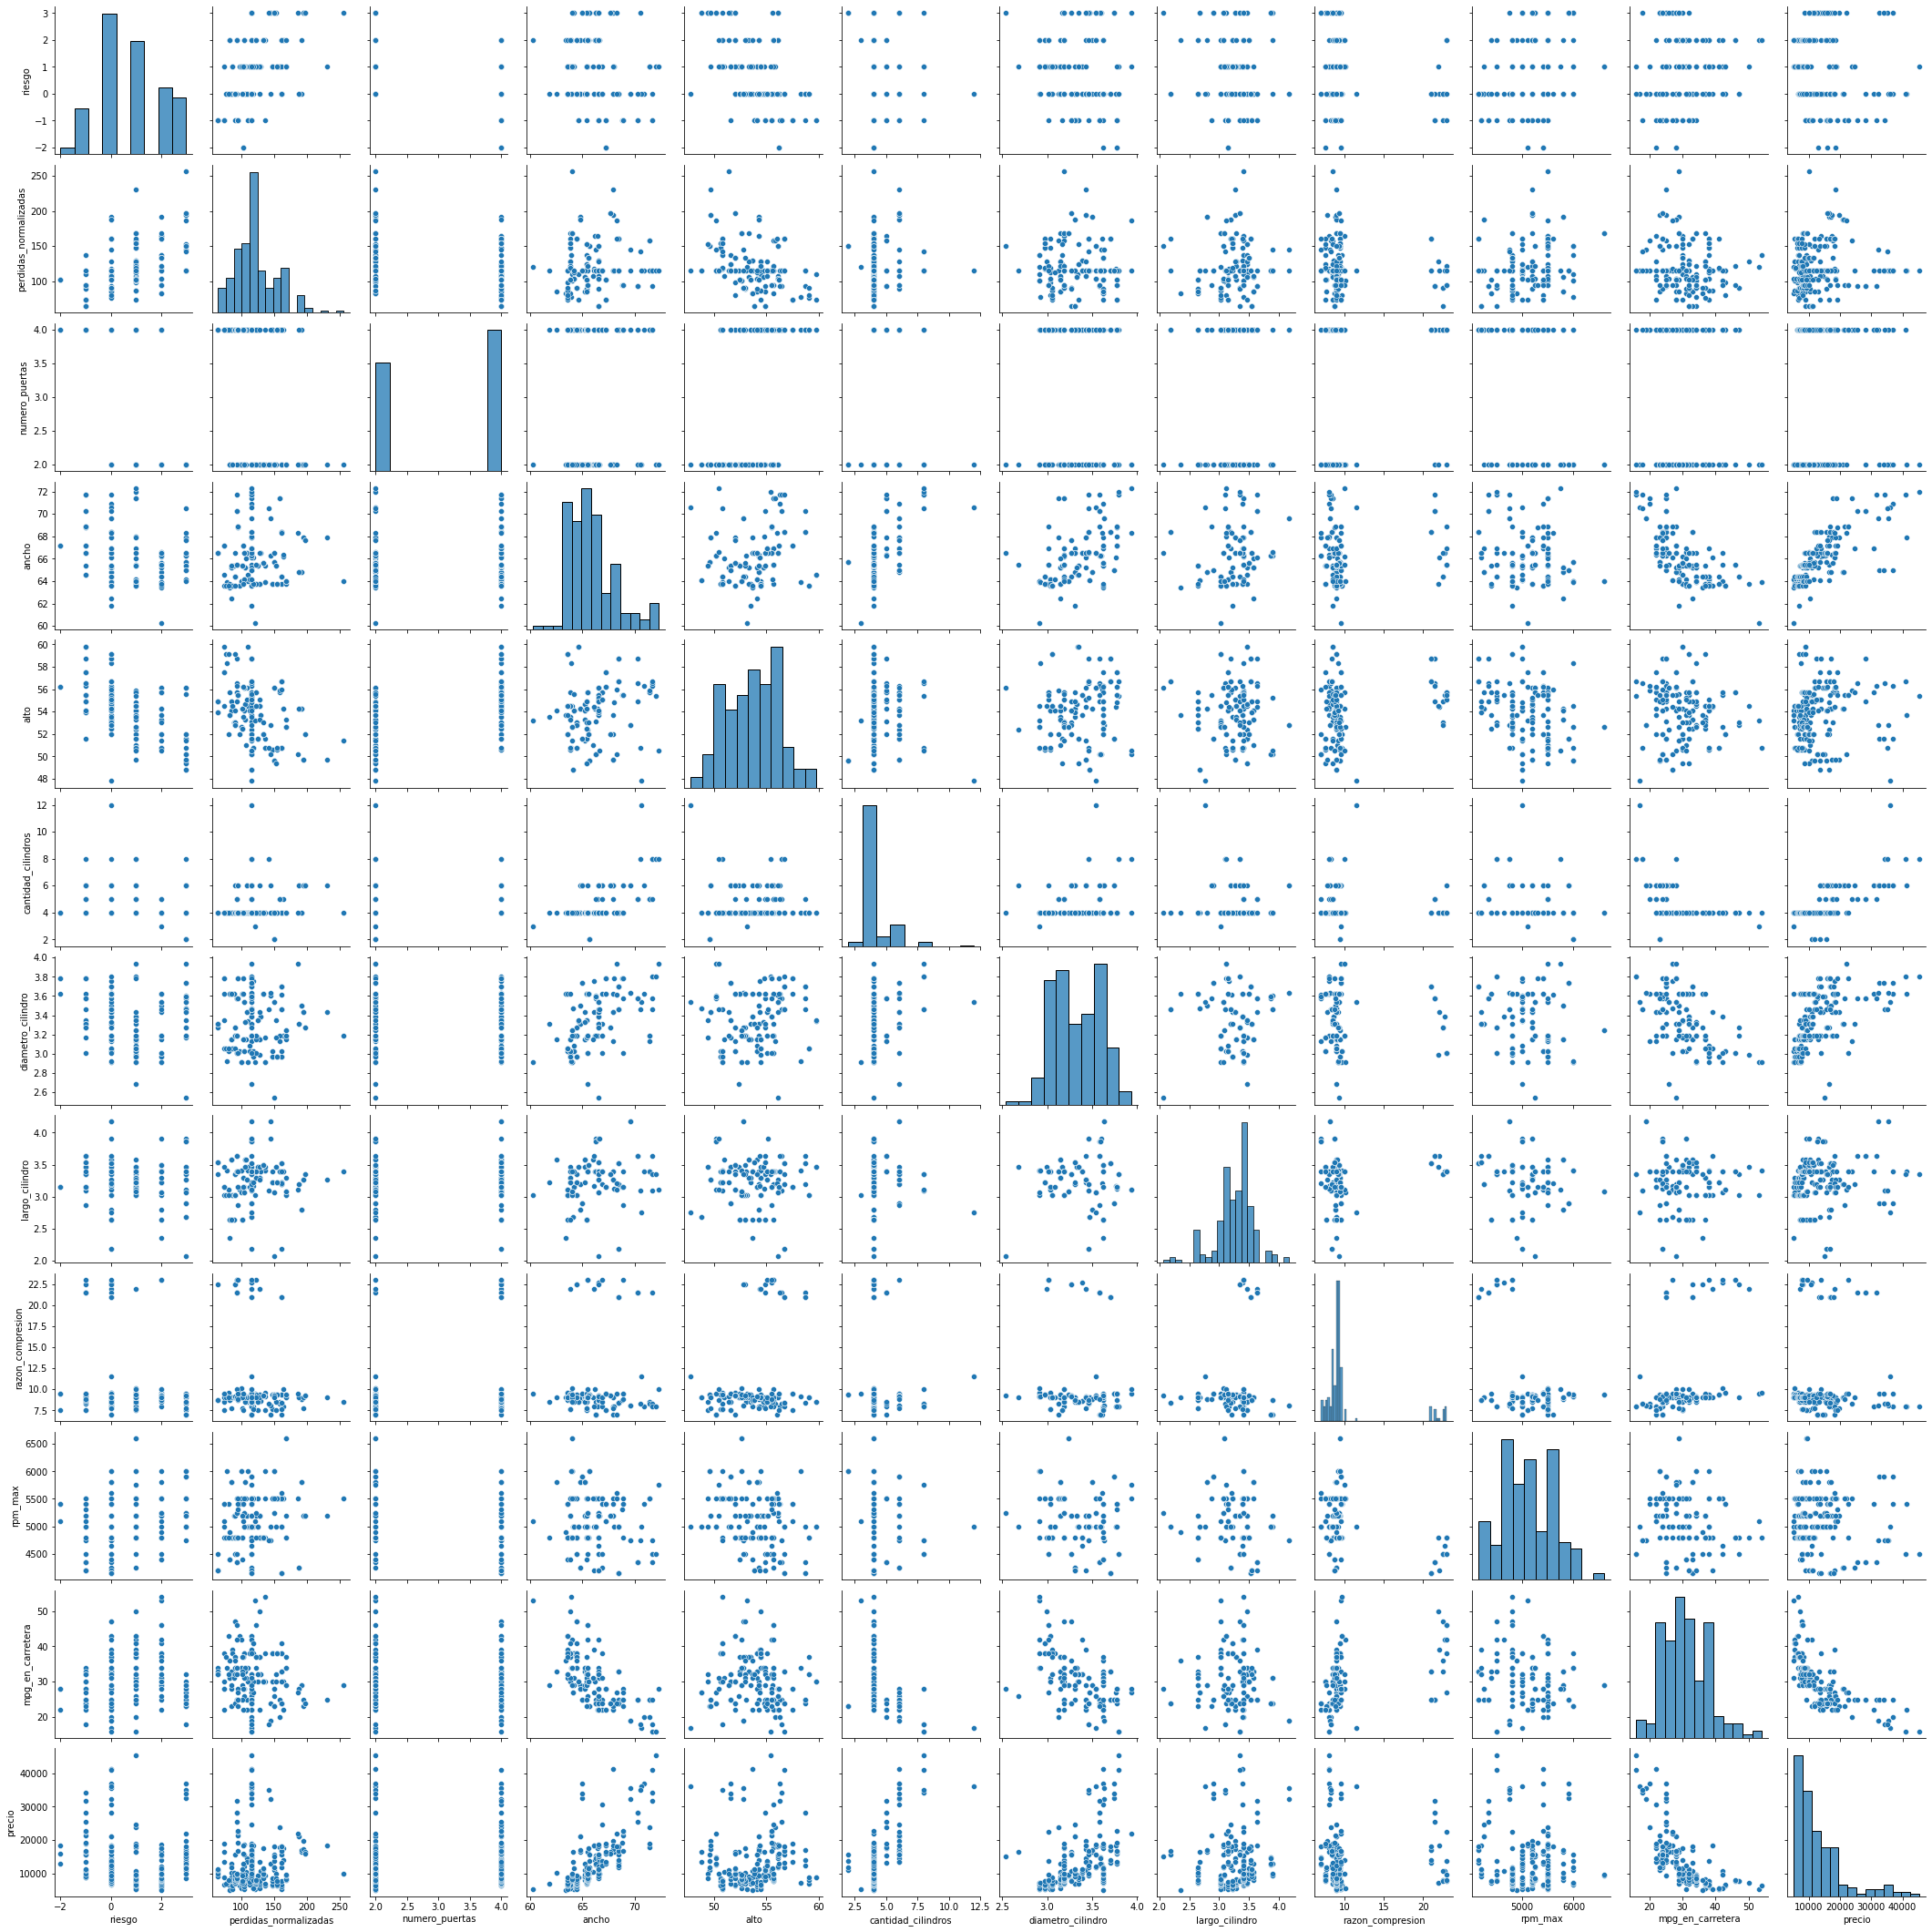

In [40]:
sns.pairplot(datos)

# Partición de la data 

In [41]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(datos.drop('precio',axis=1),
                                                datos['precio'],
                                                test_size=0.20,
                                                random_state=123,
                                                shuffle=True)

# Creación de pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

c_numericas=datos.drop('precio',axis=1).select_dtypes(include=['int64','float64']).columns
c_categoricas=datos.drop('precio',axis=1).select_dtypes(include=['object']).columns

In [43]:
pipa_numerica=Pipeline([
    ('estandarizador',StandardScaler()),
    ('imputador_numerico',SimpleImputer(strategy='median')),
    ('pca',PCA(n_components=0.95, svd_solver='full')) ## se pone svd_solver=full para poder darle un objetivo de varianza a explicar al numero de componentes, no una cantidad manual de componentes
])

pipa_categorica=Pipeline([
    ('imputador_categorico', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [44]:
from sklearn.compose import ColumnTransformer

pipa_completa=ColumnTransformer([
    ('pipa_num',pipa_numerica,c_numericas),
    ('pipa_cat',pipa_categorica, c_categoricas)],
    remainder='passthrough')

In [45]:
pipa_completa.fit_transform(x_train)

<164x60 sparse matrix of type '<class 'numpy.float64'>'
	with 2788 stored elements in Compressed Sparse Row format>

# Analizando PCA

In [46]:
pa_analizar_pca=pipa_numerica.fit_transform(x_train.select_dtypes(include=['int64','float64']))

Se rescata información de la pipa numerica y el pca

In [47]:
varianza_explicada_x_componente=pipa_numerica.named_steps['pca'].explained_variance_ratio_
componentes=pipa_numerica.named_steps['pca'].components_
numero_componentes_dados_a_pipa=pipa_numerica.named_steps['pca'].n_components_

In [48]:
nombres_columnas=x_train.select_dtypes(include=['int64','float64']).columns

composicion_componentes=pd.DataFrame(componentes, 
                                     columns=nombres_columnas,
                                     index=[f'PC-{i}' for i in range(1,numero_componentes_dados_a_pipa+1)])

In [49]:
composicion_componentes

,riesgo,perdidas_normalizadas,numero_puertas,ancho,alto,cantidad_cilindros,diametro_cilindro,largo_cilindro,razon_compresion,rpm_max,mpg_en_carretera
PC-1,-0.419168,-0.235509,0.378439,0.397228,0.397539,0.227519,0.282933,0.059308,0.183248,-0.277675,-0.252533
PC-2,0.225160,0.317091,-0.261191,0.361656,-0.241051,0.351960,0.342411,0.028281,-0.252228,0.150987,-0.513125
PC-3,0.210793,0.224545,-0.250347,0.174188,-0.130675,0.106740,-0.051024,0.448441,0.603542,-0.426139,0.184663
PC-4,0.222690,-0.134638,-0.230178,-0.088813,-0.006380,0.006693,0.357111,-0.716456,0.112328,-0.458920,0.085235
PC-5,-0.204116,0.164760,0.035645,0.008459,-0.075402,0.718623,-0.505869,-0.349777,0.083231,0.044094,0.143616
PC-6,0.057183,0.736000,0.256334,0.166341,0.324518,-0.335597,-0.047773,-0.297359,0.199043,0.112024,-0.029114
PC-7,-0.173123,0.364163,0.316699,-0.231120,-0.260505,0.016180,0.053615,0.147584,-0.481523,-0.595813,0.063732
PC-8,0.270276,-0.006641,-0.325500,-0.039481,0.687617,0.079003,-0.332102,0.125253,-0.349836,-0.269747,-0.138600
PC-9,-0.648016,0.241913,-0.579471,-0.118752,0.166103,-0.017080,0.280081,0.049232,-0.043755,0.098117,0.226652


Text(0.5, 1.0, 'Varianza explicada por componente')

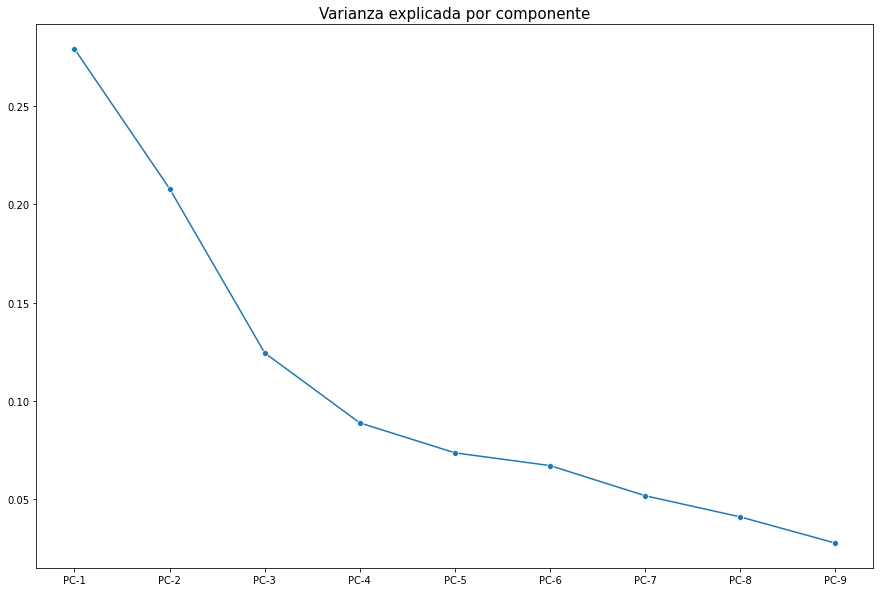

In [50]:
plt.figure(figsize=(15,10))
sns.lineplot(x=[f'PC-{i}' for i in range(1,numero_componentes_dados_a_pipa+1)],
            y=varianza_explicada_x_componente,
            markers=True,
            style=len(varianza_explicada_x_componente),
            legend=False)

plt.title('Varianza explicada por componente', fontsize=15)

Text(0.5, 1.0, 'Varianza acumulada explicada por componente')

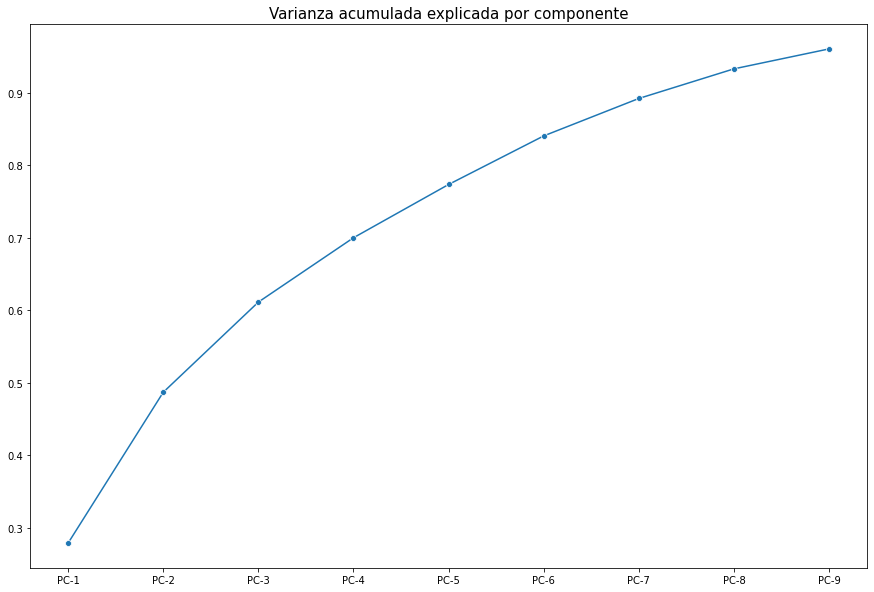

In [51]:
plt.figure(figsize=(15,10))

sns.lineplot(x=[f'PC-{i}' for i in range(1,numero_componentes_dados_a_pipa+1)],
            y=np.cumsum(varianza_explicada_x_componente),
             markers=True,
            style=len(np.cumsum(varianza_explicada_x_componente)),
            legend=False)

plt.title('Varianza acumulada explicada por componente', fontsize=15)

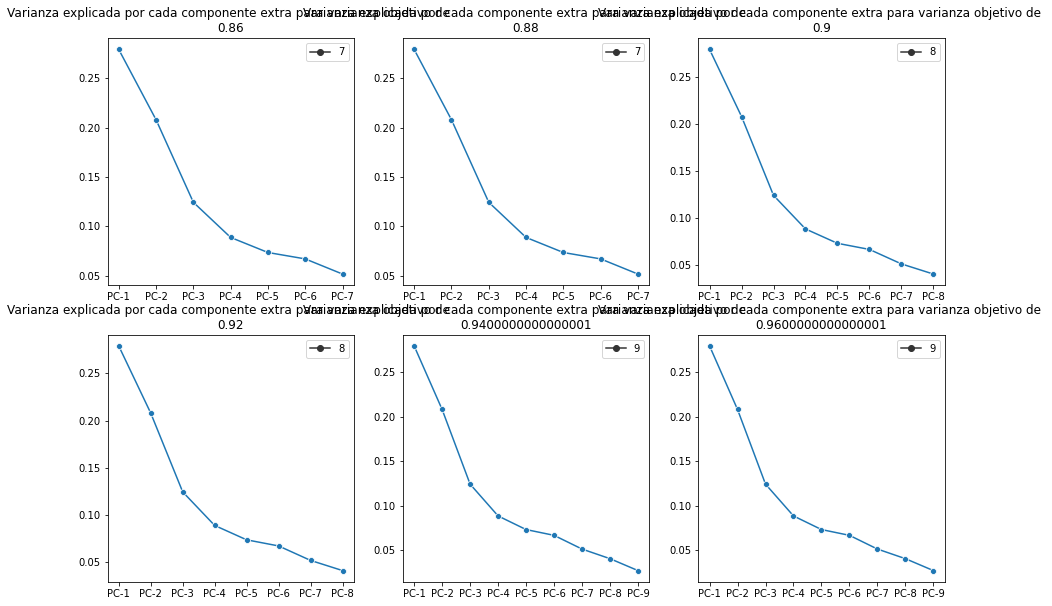

In [52]:
fig,axes=plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes=axes.flat
objetivos_varianza=np.arange(0.86,0.98,0.02)

for i in range(0,6):
    pipa_numerica.named_steps['pca'].set_params(n_components=objetivos_varianza[i])
    pipa_numerica.fit_transform(x_train.select_dtypes(include=['int64','float64']))
                                                
    sns.lineplot(x=[f'PC-{j}' for j in range(1,pipa_numerica.named_steps['pca'].n_components_+1)],
                 y=pipa_numerica.named_steps['pca'].explained_variance_ratio_,
                 markers=True,
                 style=len(np.cumsum(pipa_numerica.named_steps['pca'].explained_variance_ratio_)),
                 ax=axes[i])
    
    axes[i].set_title('Varianza explicada por cada componente extra para varianza objetivo de '+ '\n' + f'{objetivos_varianza[i]}')
    


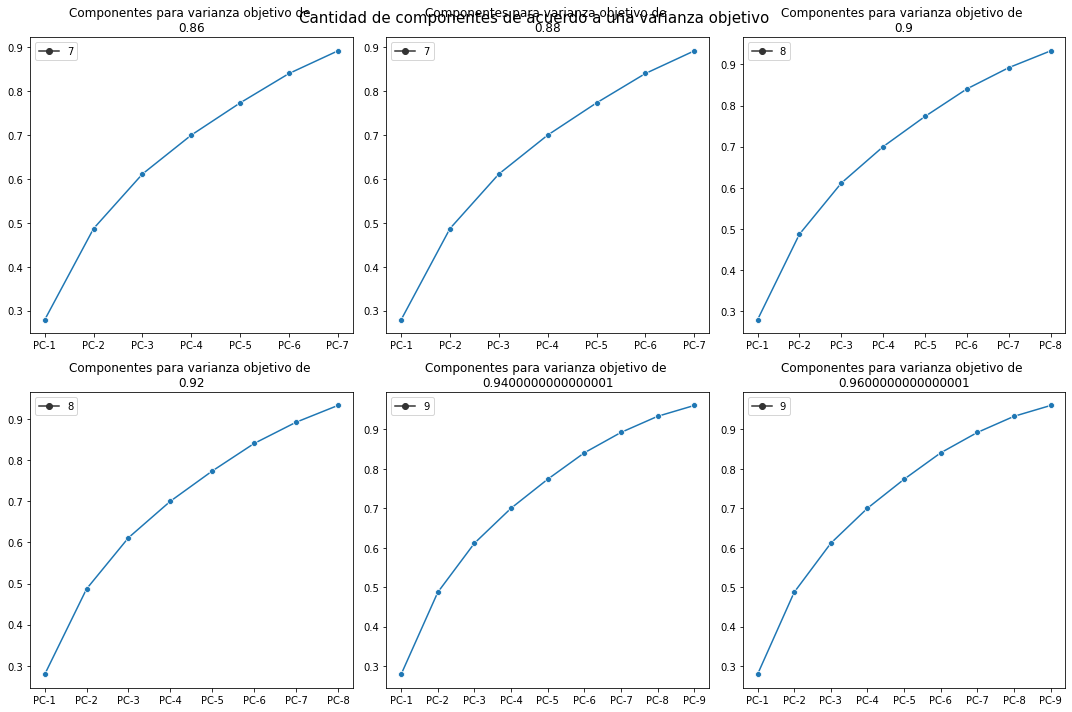

In [53]:
fig,axes=plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes=axes.flat
objetivos_varianza=np.arange(0.86,0.98,0.02)

for i in range(0,6):
    pipa_numerica.named_steps['pca'].set_params(n_components=objetivos_varianza[i])
    pipa_numerica.fit_transform(x_train.select_dtypes(include=['int64','float64']))
                                                
    sns.lineplot(x=[f'PC-{j}' for j in range(1,pipa_numerica.named_steps['pca'].n_components_+1)],
                 y=np.cumsum(pipa_numerica.named_steps['pca'].explained_variance_ratio_),
                 markers=True,
                 style=len(np.cumsum(pipa_numerica.named_steps['pca'].explained_variance_ratio_)),
                 ax=axes[i])
    
    axes[i].set_title('Componentes para varianza objetivo de ' +'\n'+ f'{objetivos_varianza[i]}')
    
fig.suptitle('Cantidad de componentes de acuerdo a una varianza objetivo ', fontsize=15)
plt.tight_layout()

In [54]:
pipa_numerica.named_steps['pca'].get_params

<bound method BaseEstimator.get_params of PCA(n_components=0.9600000000000001, svd_solver='full')>

In [55]:
analisis=pd.DataFrame(pipa_numerica.fit_transform(x_train.select_dtypes(include=['float64','int64'])))
analisis.columns=[f'PC-{i}' for i in range(1,pipa_numerica.named_steps['pca'].n_components_+1)]
analisis


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9
0,2.363764,-0.540220,-1.642749,0.108233,-0.997682,-0.232773,-0.782093,-0.287202,0.663726
1,2.491702,-0.732866,2.820313,0.525921,-0.673819,1.863639,0.444330,-0.509109,0.482586
2,-1.625102,-0.734362,0.264333,0.026685,0.176818,-0.261571,0.045383,0.420568,0.776807
3,-0.888497,0.937226,1.041120,0.544921,-1.168852,-0.441895,0.553479,0.136452,0.310344
4,0.166690,-3.218160,2.521342,0.277647,0.406971,0.390118,-1.342270,-0.317753,-1.169408
...,...,...,...,...,...,...,...,...,...
159,2.705512,1.955664,-0.705722,-0.901778,0.239007,0.105166,-0.478634,0.236335,-0.213655
160,-2.272989,-0.133609,0.730860,0.026424,0.231895,0.760218,0.389700,0.628140,0.578818
161,1.603112,-2.193497,2.898680,0.279512,-0.349594,0.236611,0.251028,-0.970086,0.029490
162,-1.269668,2.294452,-0.687894,1.196499,0.283603,-0.750956,-1.361982,-0.507313,-0.298550


In [56]:
import scipy as sp 
analisis2=pd.DataFrame(sp.sparse.csr_matrix.toarray(pipa_completa.fit_transform(x_train)))
analisis2.head(4)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,2.363764,-0.540220,-1.642749,0.108233,-0.997682,-0.232773,-0.782093,-0.287202,0.663726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.491702,-0.732866,2.820313,0.525921,-0.673819,1.863639,0.444330,-0.509109,0.482586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.625102,-0.734362,0.264333,0.026685,0.176818,-0.261571,0.045383,0.420568,0.776807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.888497,0.937226,1.041120,0.544921,-1.168852,-0.441895,0.553479,0.136452,0.310344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Validación de modelo y creacion de pipeline general

Una vez se analiza el PCA y se escoge cuantas componentes se quieran mantener, creamos un pipeline que incluya el modelo

## Utilizando un SVR como modelo (no optimizado)

In [57]:
from sklearn import set_config
from sklearn.svm import SVR

##display en set config no esta disponible en scikit learn 0.22
## necesario actualizar a 0.23

In [58]:
modelo_svr=SVR(kernel='rbf')

pipa_pa_entrenar=Pipeline([
                           ('pipa_nyc',pipa_completa),
                           ('modelo',modelo_svr)
])
set_config(pipa_pa_entrenar,display='diagram')
pipa_pa_entrenar

Pipeline(steps=[('pipa_nyc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipa_num',
                                                  Pipeline(steps=[('estandarizador',
                                                                   StandardScaler()),
                                                                  ('imputador_numerico',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('pca',
                                                                   PCA(n_components=0.9600000000000001,
                                                                       svd_solver='full'))]),
                                                  Index(['riesgo', 'perdidas_normalizadas', 'numero_puertas', 'ancho', 'alto',
       'cantidad...
       'razon_compresion', 'rpm_max', 'mpg_en_carretera'],
      dtype='object')),
                                                 ('pipa_cat',
                                                  Pipeline(steps=[('imputador_categorico',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['marca', 'tipo_combustible', 'aspiracion', 'estilo_cuerpo', 'traccion',
       'posicion_motor', 'tipode_motor', 'sistema_combustible'],
      dtype='object'))])),
                ('modelo', SVR())])

Lo que se hace a continuacion es la validación del modelo a traves del analisis de RMSE (raiz del error cuadratico medio) que tiene las mismas unidades que nuestro objetivo (precio), a través de esto se plantea que tan exacto es nuestro modelo

In [59]:
from sklearn.model_selection import cross_val_score, RepeatedKFold, LeaveOneOut, cross_validate


In [60]:
cv_scores1=cross_val_score(estimator=pipa_pa_entrenar,
                           X=x_train,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=3)

f'El promedio de error es: {cv_scores1.mean()}'

'El promedio de error es: -8345.749295120422'

In [61]:
cv=RepeatedKFold(n_splits=10, n_repeats=10)

cv_scores2=cross_val_score(estimator=pipa_pa_entrenar,
                           X=x_train,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=cv)

f'El promedio de error es: {cv_scores2.mean()}'

'El promedio de error es: -8137.472115408493'

In [62]:
cv=LeaveOneOut()

cv_scores3=cross_val_score(estimator=pipa_pa_entrenar,
                           X=x_train,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=cv)

f'El promedio de error es: {cv_scores3.mean()}'

'El promedio de error es: -5660.364779465955'

Existe un metodo de sklearn.model_selection que es cross_validate, el cual me permite analizar más métricas al mismo tiempo

In [63]:
cv=RepeatedKFold(n_splits=5,n_repeats=10)
cv_validate3=cross_validate(estimator=pipa_pa_entrenar,
                            X=x_train,
                            y=y_train.fillna(value=y_train.median()),
                            scoring=('r2','neg_root_mean_squared_error'),
                            cv=cv,
                            return_train_score=True)

Si calculamos un RepeatedKFold cross validation y le calculamos el promedio, debiese ser cercano al promedio del cross val score

In [64]:
cv_validate3=pd.DataFrame(cv_validate3)
cv_validate3['test_neg_root_mean_squared_error'].mean()

-8347.564871705656

Para análisis gráfico utilizaremos el método de validación LeaveOneOut()

Text(0.5, 1.0, 'Distribución de la raiz del error de la validacion cruzada con método leave one out')

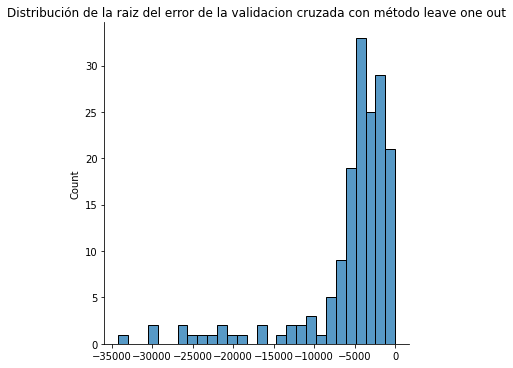

In [65]:
sns.displot(cv_scores3,
            stat='count',
            kde_kws={'linewidth':1},
            kind='hist')

plt.title('Distribución de la raiz del error de la validacion cruzada con método leave one out')


Para ver gráficamente como es la relación entre valor real y predicho con el conjunto de entrenamiento, podemos utilizar cross_val_predicts de la siguiente manera:

In [66]:
from sklearn.model_selection import cross_val_predict, KFold

In [67]:
import statsmodels.api as sm 

In [68]:
cv=LeaveOneOut()
cv_predicts=cross_val_predict(estimator=pipa_pa_entrenar,
                              X=x_train,
                              y=y_train.fillna(value=y_train.median()),
                              cv=cv,
                              n_jobs=-1)

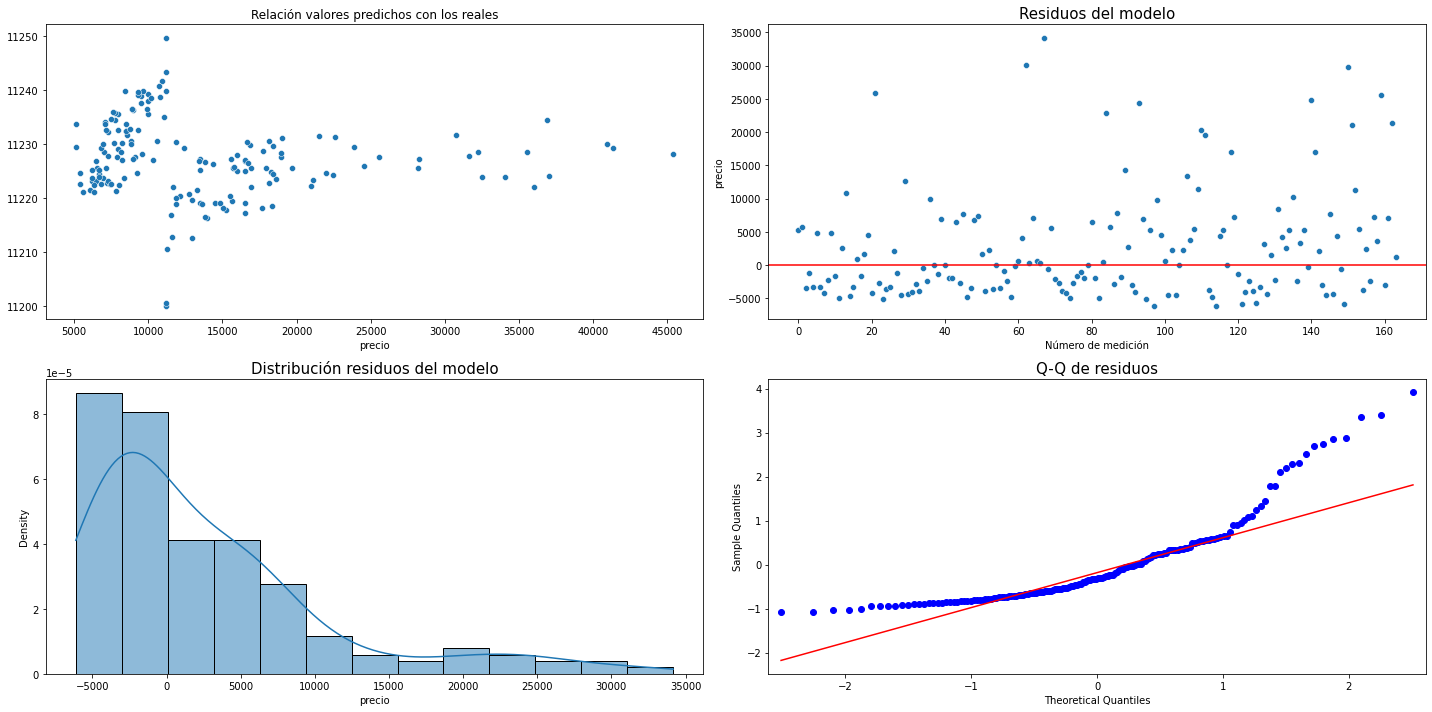

In [69]:
fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(20,10))
axes=axes.flat

sns.scatterplot(x=y_train.fillna(value=y_train.median()),
                y=cv_predicts,
                ax=axes[0])
axes[0].set_title('Relación valores predichos con los reales')


sns.scatterplot(x=[k for k in range(0,len(x_train))],
            y=y_train.fillna(value=y_train.median())-cv_predicts,
            ax=axes[1])
axes[1].set_title('Residuos del modelo',fontsize=15)
axes[1].set_xlabel('Número de medición')
axes[1].axhline(y=0, color='red')

sns.histplot(x=y_train.fillna(value=y_train.median())-cv_predicts,
             stat='density',
             kde=True,
            ax=axes[2])
axes[2].set_title('Distribución residuos del modelo', fontsize=15)

sm.qqplot(data=y_train.fillna(value=y_train.median())-cv_predicts,
          fit=True,
          line='q',
          ax=axes[3])
axes[3].set_title('Q-Q de residuos', fontsize=15)

plt.tight_layout()

De los gráficos anteriores vemos que el modelo se ajusta mal a los datos 

## Utilizando árbol de decisión

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
modelo_arbol=DecisionTreeRegressor()

In [72]:
pipa_pa_entrenar=Pipeline([
                           ('pipa_preprocesado',pipa_completa),
                           ('arbol',modelo_arbol)
])

In [73]:
pipa_pa_entrenar

Pipeline(steps=[('pipa_preprocesado',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipa_num',
                                                  Pipeline(steps=[('estandarizador',
                                                                   StandardScaler()),
                                                                  ('imputador_numerico',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('pca',
                                                                   PCA(n_components=0.9600000000000001,
                                                                       svd_solver='full'))]),
                                                  Index(['riesgo', 'perdidas_normalizadas', 'numero_puertas', 'ancho', 'alto',...
       'razon_compresion', 'rpm_max', 'mpg_en_carretera'],
      dtype='object')),
                                                 ('pipa_cat',
                                                  Pipeline(steps=[('imputador_categorico',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['marca', 'tipo_combustible', 'aspiracion', 'estilo_cuerpo', 'traccion',
       'posicion_motor', 'tipode_motor', 'sistema_combustible'],
      dtype='object'))])),
                ('arbol', DecisionTreeRegressor())])

In [74]:
cv_scores1=cross_val_score(estimator=pipa_pa_entrenar,
                           X=x_train,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=3)

f'El promedio de error es: {cv_scores1.mean()}'

'El promedio de error es: -4617.650227118541'

In [75]:
cv=RepeatedKFold(n_splits=10, n_repeats=10)

cv_scores2=cross_val_score(estimator=pipa_pa_entrenar,
                           X=x_train,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=cv)

f'El promedio de error es: {cv_scores2.mean()}'

'El promedio de error es: -3962.0840009336985'

In [76]:
cv=LeaveOneOut()

cv_scores3=cross_val_score(estimator=pipa_pa_entrenar,
                           X=x_train,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=cv)

f'El promedio de error es: {cv_scores3.mean()}'

'El promedio de error es: -2557.7815040650403'

In [77]:
cv=RepeatedKFold(n_splits=5,n_repeats=10)
cv_validate3=cross_validate(estimator=pipa_pa_entrenar,
                            X=x_train,
                            y=y_train.fillna(value=y_train.median()),
                            scoring=('r2','neg_root_mean_squared_error'),
                            cv=cv,
                            return_train_score=True)

In [78]:
cv_validate3=pd.DataFrame(cv_validate3)
cv_validate3.head(4)

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.020978,0.007138,0.723450,0.996986,-4283.688892,-442.332579
1,0.016516,0.007703,0.622442,0.996507,-4789.090016,-479.935720
2,0.016298,0.007593,0.778190,0.997608,-3902.158063,-392.461040
3,0.016312,0.007513,0.893134,0.996105,-2837.167108,-493.461575


Text(0.5, 1.0, 'Distribución de la raiz del error de la validacion cruzada con método leave one out')

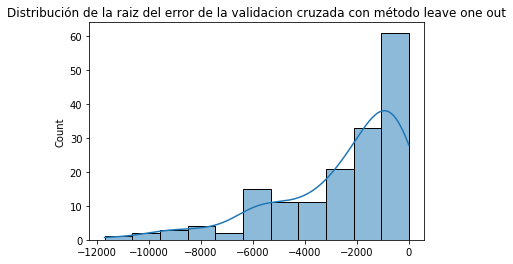

In [79]:
sns.histplot(cv_scores3,
            kde=True)

plt.title('Distribución de la raiz del error de la validacion cruzada con método leave one out')


In [80]:
cv=LeaveOneOut()
cv_predicts=cross_val_predict(estimator=pipa_pa_entrenar,
                              X=x_train,
                              y=y_train.fillna(value=y_train.median()),
                              cv=cv,
                              n_jobs=-1)

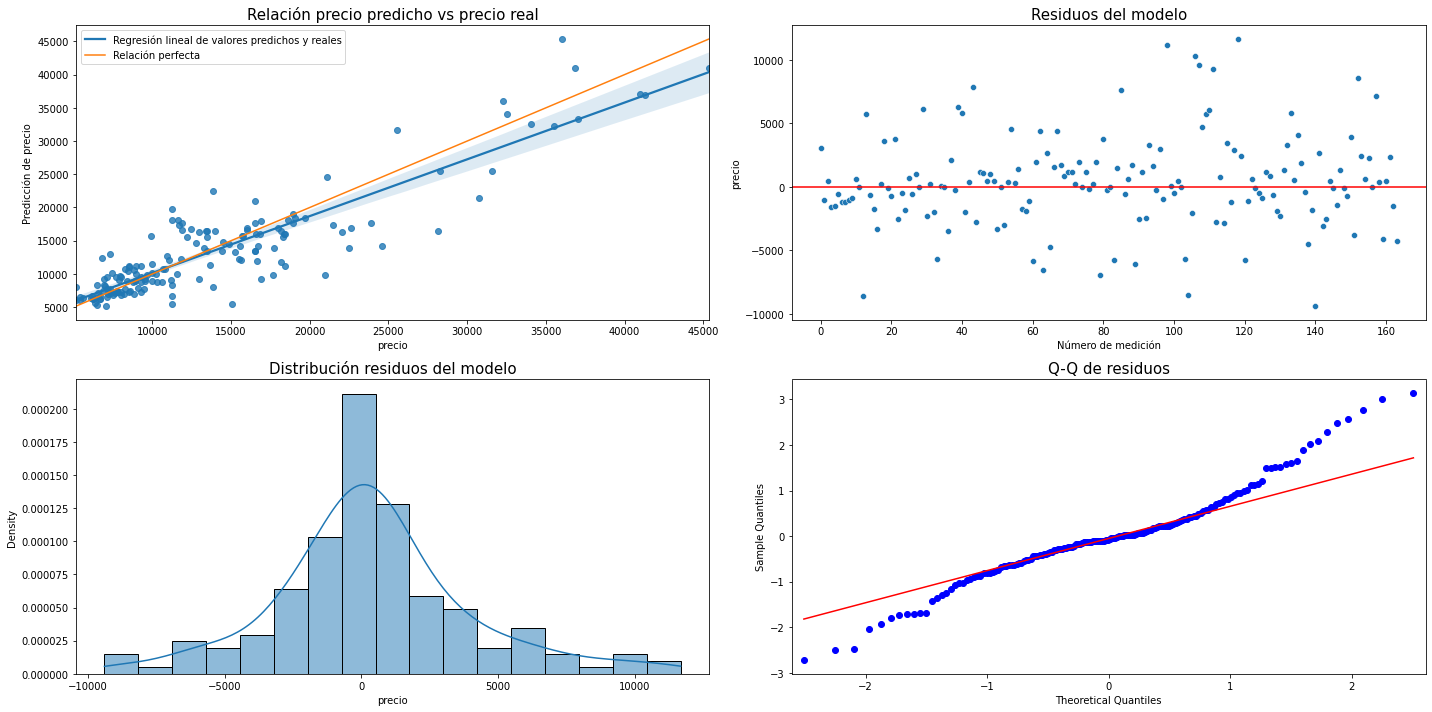

In [81]:
fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(20,10))
axes=axes.flat

sns.regplot(x=y_train.fillna(value=y_train.median()),
                y=cv_predicts,
                ax=axes[0])
sns.lineplot(x=[y_train.min(), y_train.max()],
             y=[y_train.min(), y_train.max()],
             ax=axes[0])
axes[0].legend(['Regresión lineal de valores predichos y reales','Relación perfecta'])

axes[0].set_title('Relación precio predicho vs precio real', fontsize=15)
axes[0].set_ylabel('Predicción de precio')

sns.scatterplot(x=[k for k in range(0,len(x_train))],
            y=y_train.fillna(value=y_train.median())-cv_predicts,
            ax=axes[1])
axes[1].set_title('Residuos del modelo',fontsize=15)
axes[1].set_xlabel('Número de medición')
axes[1].axhline(y=0, color='red')

sns.histplot(x=y_train.fillna(value=y_train.median())-cv_predicts,
             stat='density',
             kde=True,
            ax=axes[2])
axes[2].set_title('Distribución residuos del modelo',fontsize=15)

sm.qqplot(data=y_train.fillna(value=y_train.median())-cv_predicts,
          fit=True,
          line='q',
          ax=axes[3])
axes[3].set_title('Q-Q de residuos', fontsize=15)

fig.tight_layout()

## Utilizando Ridge

In [82]:
from sklearn.linear_model import Ridge

In [83]:
modelo_ridge=Ridge()

In [84]:
pipa_pa_entrenar=Pipeline([
                           ('pipa_preprocesado',pipa_completa),
                           ('ridge',modelo_ridge)
])

In [85]:
pipa_pa_entrenar

Pipeline(steps=[('pipa_preprocesado',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipa_num',
                                                  Pipeline(steps=[('estandarizador',
                                                                   StandardScaler()),
                                                                  ('imputador_numerico',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('pca',
                                                                   PCA(n_components=0.9600000000000001,
                                                                       svd_solver='full'))]),
                                                  Index(['riesgo', 'perdidas_normalizadas', 'numero_puertas', 'ancho', 'alto',...
       'razon_compresion', 'rpm_max', 'mpg_en_carretera'],
      dtype='object')),
                                                 ('pipa_cat',
                                                  Pipeline(steps=[('imputador_categorico',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['marca', 'tipo_combustible', 'aspiracion', 'estilo_cuerpo', 'traccion',
       'posicion_motor', 'tipode_motor', 'sistema_combustible'],
      dtype='object'))])),
                ('ridge', Ridge())])

In [86]:
cv_scores1=cross_val_score(estimator=pipa_pa_entrenar,
                           X=x_train,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=3)

f'El promedio de error es: {cv_scores1.mean()}'

'El promedio de error es: -3499.312666241183'

In [87]:
cv=RepeatedKFold(n_splits=10, n_repeats=10)

cv_scores2=cross_val_score(estimator=pipa_pa_entrenar,
                           X=x_train,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=cv)

f'El promedio de error es: {cv_scores2.mean()}'

'El promedio de error es: -3576.8410982230785'

In [88]:
cv=LeaveOneOut()

cv_scores3=cross_val_score(estimator=pipa_pa_entrenar,
                           X=x_train,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=cv)

f'El promedio de error es: {cv_scores3.mean()}'

'El promedio de error es: -2437.1555956273696'

In [89]:
cv=RepeatedKFold(n_splits=5,n_repeats=10)
cv_validate3=cross_validate(estimator=pipa_pa_entrenar,
                            X=x_train,
                            y=y_train.fillna(value=y_train.median()),
                            scoring=('r2','neg_root_mean_squared_error'),
                            cv=cv,
                            return_train_score=True)

In [90]:
cv_validate3=pd.DataFrame(cv_validate3)
cv_validate3.head(4)

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.023989,0.008179,0.804112,0.922440,-4059.552086,-2161.601499
1,0.018510,0.007873,0.550375,0.931996,-5232.318799,-2119.308854
2,0.018014,0.007483,0.784845,0.916208,-3426.380435,-2384.553243
3,0.018009,0.007794,0.844473,0.918383,-2733.814286,-2378.596017


Text(0.5, 1.0, 'Distribución de la raiz del error de la validacion cruzada con método leave one out')

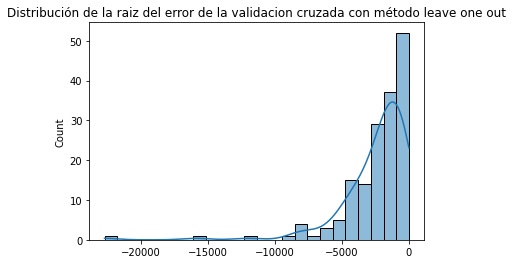

In [91]:
sns.histplot(cv_scores3,
            kde=True)

plt.title('Distribución de la raiz del error de la validacion cruzada con método leave one out')


In [92]:
cv=LeaveOneOut()
cv_predicts=cross_val_predict(estimator=pipa_pa_entrenar,
                              X=x_train,
                              y=y_train.fillna(value=y_train.median()),
                              cv=cv,
                              n_jobs=-1)

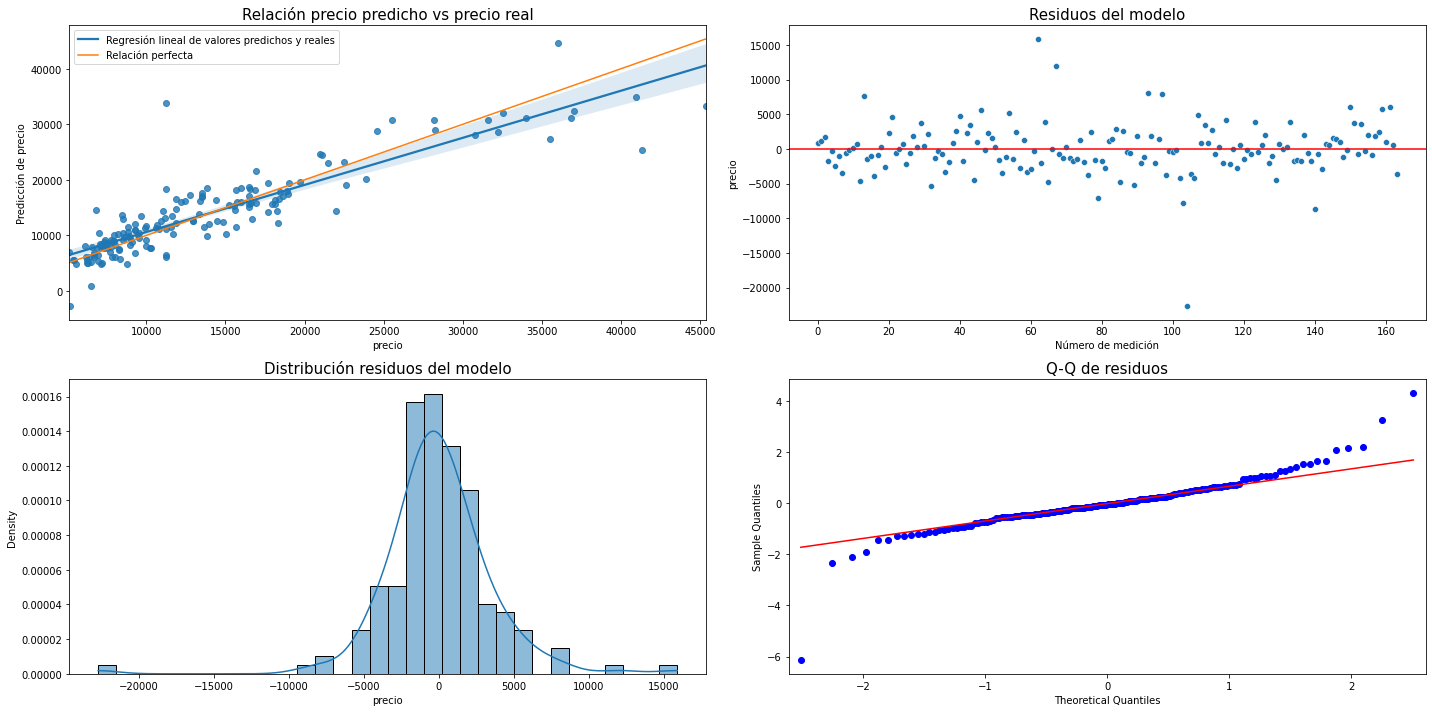

In [93]:
fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(20,10))
axes=axes.flat

sns.regplot(x=y_train.fillna(value=y_train.median()),
                y=cv_predicts,
                ax=axes[0])
sns.lineplot(x=[y_train.min(), y_train.max()],
             y=[y_train.min(), y_train.max()],
             ax=axes[0])
axes[0].legend(['Regresión lineal de valores predichos y reales','Relación perfecta'])

axes[0].set_title('Relación precio predicho vs precio real', fontsize=15)
axes[0].set_ylabel('Predicción de precio')

sns.scatterplot(x=[k for k in range(0,len(x_train))],
            y=y_train.fillna(value=y_train.median())-cv_predicts,
            ax=axes[1])
axes[1].set_title('Residuos del modelo',fontsize=15)
axes[1].set_xlabel('Número de medición')
axes[1].axhline(y=0, color='red')

sns.histplot(x=y_train.fillna(value=y_train.median())-cv_predicts,
             stat='density',
             kde=True,
            ax=axes[2])
axes[2].set_title('Distribución residuos del modelo',fontsize=15)

sm.qqplot(data=y_train.fillna(value=y_train.median())-cv_predicts,
          fit=True,
          line='q',
          ax=axes[3])
axes[3].set_title('Q-Q de residuos', fontsize=15)

fig.tight_layout()

## Procesos gaussianos

In [94]:
from sklearn.gaussian_process import GaussianProcessRegressor

modelo_gpr=GaussianProcessRegressor()

In [95]:
pipa_pa_entrenar=Pipeline([
                           ('pipa_preprocesado',pipa_completa),
                           ('gpr',modelo_gpr)
])

In [96]:
pipa_pa_entrenar

Pipeline(steps=[('pipa_preprocesado',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipa_num',
                                                  Pipeline(steps=[('estandarizador',
                                                                   StandardScaler()),
                                                                  ('imputador_numerico',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('pca',
                                                                   PCA(n_components=0.9600000000000001,
                                                                       svd_solver='full'))]),
                                                  Index(['riesgo', 'perdidas_normalizadas', 'numero_puertas', 'ancho', 'alto',...
       'razon_compresion', 'rpm_max', 'mpg_en_carretera'],
      dtype='object')),
                                                 ('pipa_cat',
                                                  Pipeline(steps=[('imputador_categorico',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['marca', 'tipo_combustible', 'aspiracion', 'estilo_cuerpo', 'traccion',
       'posicion_motor', 'tipode_motor', 'sistema_combustible'],
      dtype='object'))])),
                ('gpr', GaussianProcessRegressor())])

Existe un problema: el algoritmo de los procesos gaussianos al parecer no acepta de buena manera los sparse matrix por lo que primero hay que transformar con la pipa completa y luego convertir a un array numerico 

In [97]:
x_train2=pipa_completa.fit_transform(x_train)
x_train2=x_train2.toarray()
cv_scores1=cross_val_score(estimator=modelo_gpr,
                           X=x_train2,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=3)

f'El promedio de error es: {cv_scores1.mean()}'

'El promedio de error es: -11911.128603671636'

In [98]:
cv=RepeatedKFold(n_splits=10, n_repeats=10)

cv_scores2=cross_val_score(estimator=modelo_gpr,
                           X=x_train2,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=cv)

f'El promedio de error es: {cv_scores2.mean()}'

'El promedio de error es: -11080.082614435458'

In [99]:
cv=LeaveOneOut()

cv_scores3=cross_val_score(estimator=modelo_gpr,
                           X=x_train2,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=cv)

f'El promedio de error es: {cv_scores3.mean()}'

'El promedio de error es: -7800.884111980892'

In [100]:
cv=RepeatedKFold(n_splits=5,n_repeats=10)
cv_validate3=cross_validate(estimator=modelo_gpr,
                            X=x_train2,
                            y=y_train.fillna(value=y_train.median()),
                            scoring=('r2','neg_root_mean_squared_error'),
                            cv=cv,
                            return_train_score=True)

In [101]:
cv_validate3=pd.DataFrame(cv_validate3)
cv_validate3.head(4)

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.005043,0.001460,-1.363474,0.996234,-12363.695582,-496.219516
1,0.010404,0.001386,-1.382778,0.997419,-9262.629911,-431.101908
2,0.010011,0.001364,-0.849118,0.997370,-12580.957977,-395.172766
3,0.009793,0.001417,-0.813427,0.997131,-12968.940568,-408.425575


Text(0.5, 1.0, 'Distribución de la raiz del error de la validacion cruzada con método leave one out')

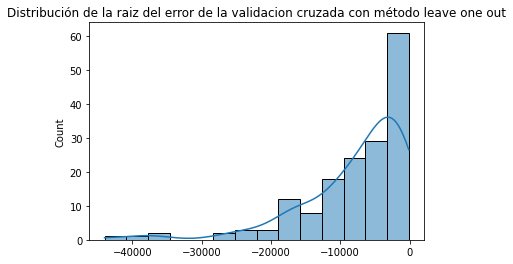

In [102]:
sns.histplot(cv_scores3,
            kde=True)

plt.title('Distribución de la raiz del error de la validacion cruzada con método leave one out')


In [103]:
cv=LeaveOneOut()
cv_predicts=cross_val_predict(estimator=modelo_gpr,
                              X=x_train2,
                              y=y_train.fillna(value=y_train.median()),
                              cv=cv,
                              n_jobs=-1)

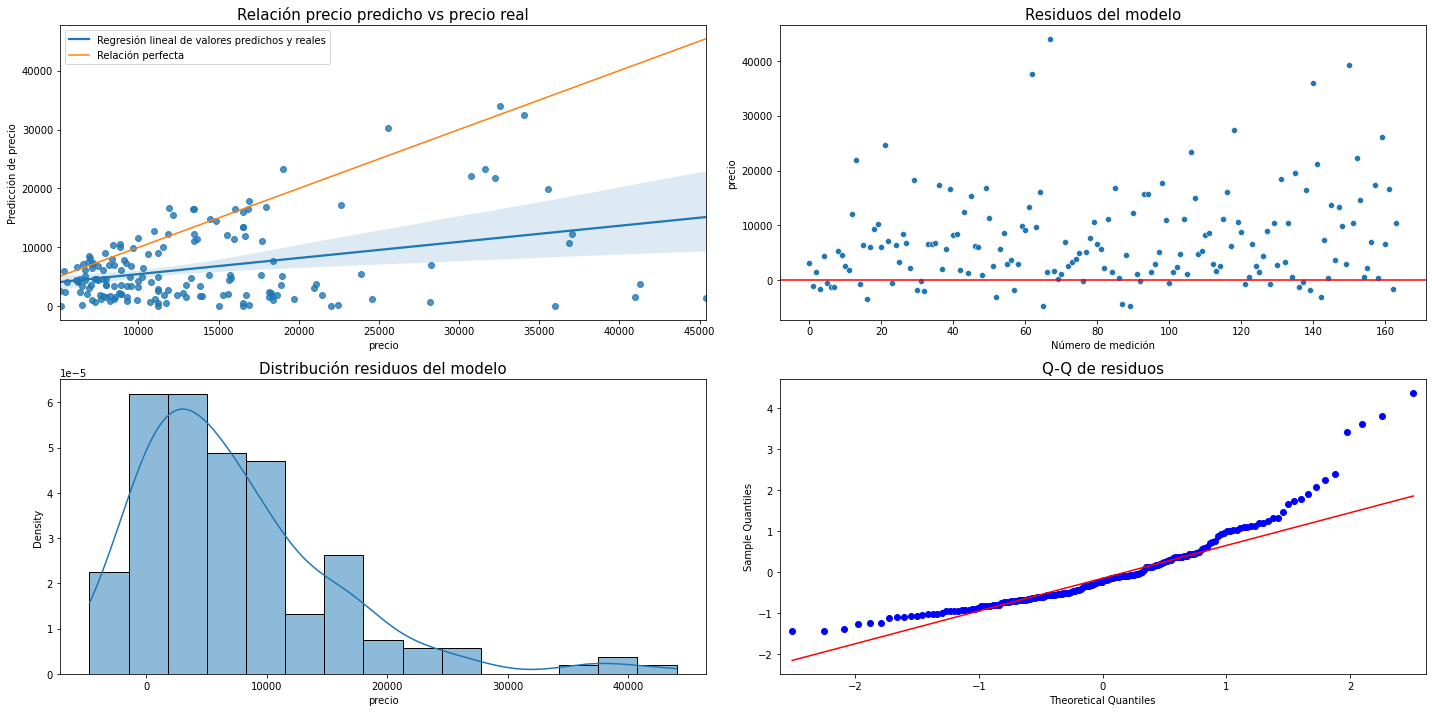

In [104]:
fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(20,10))
axes=axes.flat

sns.regplot(x=y_train.fillna(value=y_train.median()),
                y=cv_predicts,
                ax=axes[0])
sns.lineplot(x=[y_train.min(), y_train.max()],
             y=[y_train.min(), y_train.max()],
             ax=axes[0])
axes[0].legend(['Regresión lineal de valores predichos y reales','Relación perfecta'])

axes[0].set_title('Relación precio predicho vs precio real', fontsize=15)
axes[0].set_ylabel('Predicción de precio')

sns.scatterplot(x=[k for k in range(0,len(x_train))],
            y=y_train.fillna(value=y_train.median())-cv_predicts,
            ax=axes[1])
axes[1].set_title('Residuos del modelo',fontsize=15)
axes[1].set_xlabel('Número de medición')
axes[1].axhline(y=0, color='red')

sns.histplot(x=y_train.fillna(value=y_train.median())-cv_predicts,
             stat='density',
             kde=True,
            ax=axes[2])
axes[2].set_title('Distribución residuos del modelo',fontsize=15)

sm.qqplot(data=y_train.fillna(value=y_train.median())-cv_predicts,
          fit=True,
          line='q',
          ax=axes[3])
axes[3].set_title('Q-Q de residuos', fontsize=15)

fig.tight_layout()

## Iteración de modelos para agilizar la obtención de resultados

Los modelos a evaluar serán principalmente lineales y arboles puesto que estos demostraron ser mejores, además se aplicará primero el pipeline de transformación y luego solo se utilizará el modelo para obtener los resultados, a fin de no obtener problemas como con el proceso gaussiano:

In [105]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Lars, LassoLars
from sklearn.ensemble import RandomForestRegressor

x_train2=pipa_completa.fit_transform(x_train)
x_train2=x_train2.toarray()

modelo_lasso=Lasso()
modelo_elastic=ElasticNet()
modelo_lars=Lars()
modelo_laso_lars=LassoLars()
modelo_rf=RandomForestRegressor()

# los algoritmos lars se comportaban de forma extraña, analizar algun día

prueba=(('modelo_lasso',modelo_lasso),
        ('modelo_elastic',modelo_elastic),
        ('modelo_rf', modelo_rf))

In [106]:
resultados=[] #se crea una lista vacia que se rellenará con los resultados del ciclo de abajo, para anexar
#resultados (que se peguen sin reemplazarse) usamos resultados.append

In [107]:
for nombre,modelo in prueba:
  cv=LeaveOneOut()
  cv_scores=cross_val_score(estimator=modelo,
                            X=x_train2,
                            y=y_train.fillna(value=y_train.median()),
                            scoring='neg_root_mean_squared_error',
                            cv=cv)
  
  resultados.append((nombre,cv_scores.mean()))

In [108]:
resultados

[('modelo_lasso', -2432.219161550679),
 ('modelo_elastic', -2957.7270642015187),
 ('modelo_rf', -2309.228796457607)]

## Random forest: mejores resultados del paso anterior

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
modelo_rf=RandomForestRegressor()

In [111]:
pipa_pa_entrenar=Pipeline([
                           ('pipa_preprocesado',pipa_completa),
                           ('modelo_rf',modelo_rf)
])
pipa_pa_entrenar

Pipeline(steps=[('pipa_preprocesado',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipa_num',
                                                  Pipeline(steps=[('estandarizador',
                                                                   StandardScaler()),
                                                                  ('imputador_numerico',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('pca',
                                                                   PCA(n_components=0.9600000000000001,
                                                                       svd_solver='full'))]),
                                                  Index(['riesgo', 'perdidas_normalizadas', 'numero_puertas', 'ancho', 'alto',...
      dtype='object')),
                                                 ('pipa_cat',
                                                  Pipeline(steps=[('imputador_categorico',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['marca', 'tipo_combustible', 'aspiracion', 'estilo_cuerpo', 'traccion',
       'posicion_motor', 'tipode_motor', 'sistema_combustible'],
      dtype='object'))])),
                ('modelo_rf', RandomForestRegressor())])

Al parecer no tendremos problemas con pasarle una sparse matrix al pipeline construido

In [112]:
#x_train2=pipa_completa.fit_transform(x_train)
#x_train2=x_train2.toarray()
cv_scores1=cross_val_score(estimator=pipa_pa_entrenar,
                           X=x_train,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=3)

f'El promedio de error es: {cv_scores1.mean()}'

'El promedio de error es: -3810.9969571875336'

In [113]:
cv=RepeatedKFold(n_splits=10, n_repeats=10)

cv_scores2=cross_val_score(estimator=pipa_pa_entrenar,
                           X=x_train,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=cv)

f'El promedio de error es: {cv_scores2.mean()}'

'El promedio de error es: -3491.3483840760096'

In [114]:
cv=LeaveOneOut()

cv_scores3=cross_val_score(estimator=pipa_pa_entrenar,
                           X=x_train,
                           y=y_train.fillna(value=y_train.median()),
                           scoring='neg_root_mean_squared_error',
                           cv=cv)

f'El promedio de error es: {cv_scores3.mean()}'

'El promedio de error es: -2255.892437330623'

In [115]:
cv=RepeatedKFold(n_splits=5,n_repeats=10)
cv_validate3=cross_validate(estimator=pipa_pa_entrenar,
                            X=x_train,
                            y=y_train.fillna(value=y_train.median()),
                            scoring=('r2','neg_root_mean_squared_error'),
                            cv=cv,
                            return_train_score=True)

In [116]:
cv_validate3=pd.DataFrame(cv_validate3)
cv_validate3.head(4)

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.258922,0.018991,0.727193,0.966551,-3636.145037,-1524.067466
1,0.202277,0.014843,0.775841,0.971514,-3944.742707,-1351.287954
2,0.199543,0.014765,0.857896,0.963223,-3731.640567,-1445.661008
3,0.259756,0.015528,0.732340,0.965775,-4146.151761,-1493.478983


Text(0.5, 1.0, 'Distribución de la raiz del error de la validacion cruzada con método leave one out')

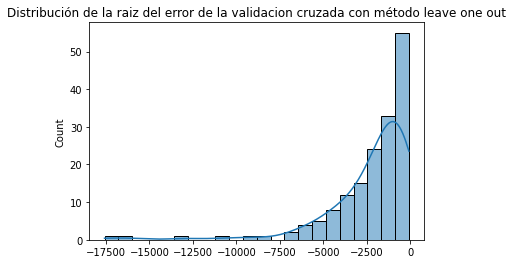

In [117]:
sns.histplot(cv_scores3,
            kde=True)

plt.title('Distribución de la raiz del error de la validacion cruzada con método leave one out')


In [118]:
cv=LeaveOneOut()
cv_predicts=cross_val_predict(estimator=pipa_pa_entrenar,
                              X=x_train,
                              y=y_train.fillna(value=y_train.median()),
                              cv=cv,
                              n_jobs=-1)

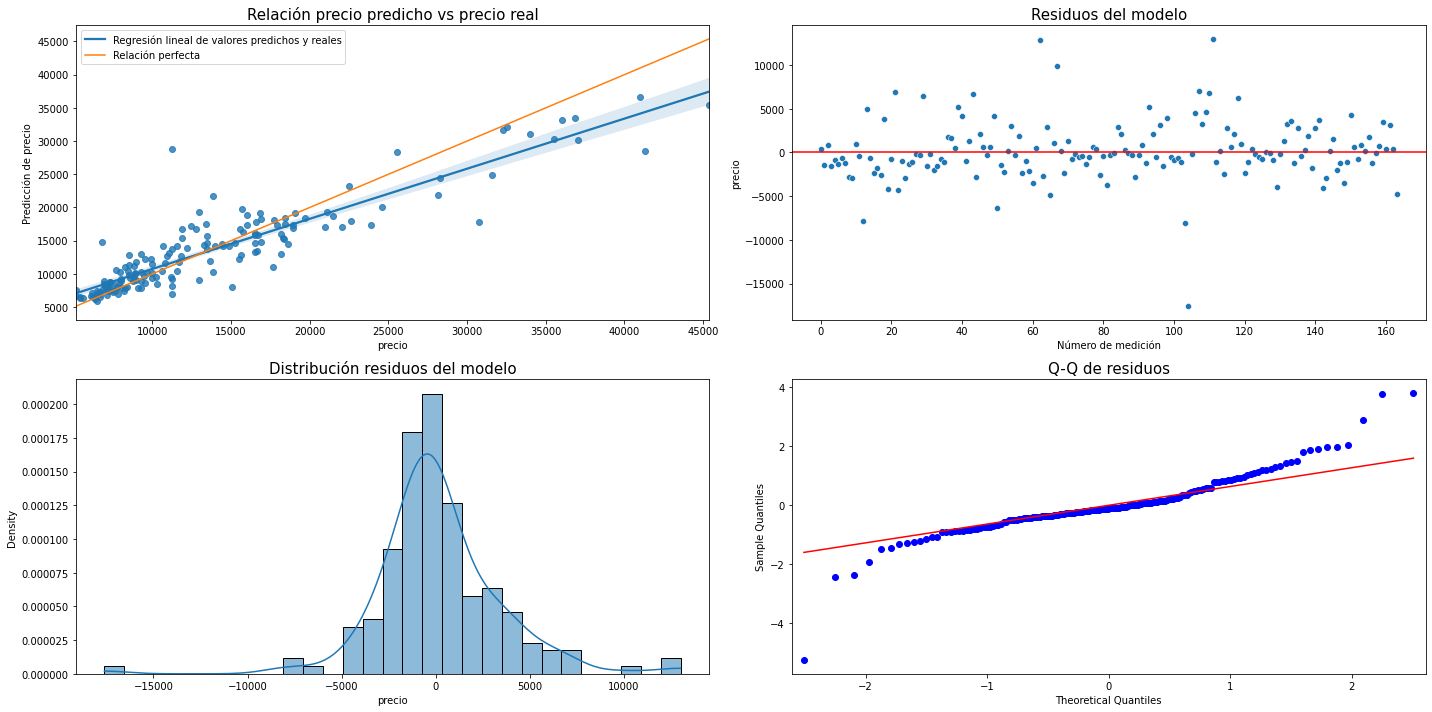

In [119]:
fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(20,10))
axes=axes.flat

sns.regplot(x=y_train.fillna(value=y_train.median()),
                y=cv_predicts,
                ax=axes[0])
sns.lineplot(x=[y_train.min(), y_train.max()],
             y=[y_train.min(), y_train.max()],
             ax=axes[0])
axes[0].legend(['Regresión lineal de valores predichos y reales','Relación perfecta'])

axes[0].set_title('Relación precio predicho vs precio real', fontsize=15)
axes[0].set_ylabel('Predicción de precio')

sns.scatterplot(x=[k for k in range(0,len(x_train))],
            y=y_train.fillna(value=y_train.median())-cv_predicts,
            ax=axes[1])
axes[1].set_title('Residuos del modelo',fontsize=15)
axes[1].set_xlabel('Número de medición')
axes[1].axhline(y=0, color='red')

sns.histplot(x=y_train.fillna(value=y_train.median())-cv_predicts,
             stat='density',
             kde=True,
            ax=axes[2])
axes[2].set_title('Distribución residuos del modelo',fontsize=15)

sm.qqplot(data=y_train.fillna(value=y_train.median())-cv_predicts,
          fit=True,
          line='q',
          ax=axes[3])
axes[3].set_title('Q-Q de residuos', fontsize=15)

fig.tight_layout()

## Error de predicción con el set de testeo

### Modelo Ridge

In [120]:
from sklearn.linear_model import Ridge
modelo_ridge=Ridge()

pipa_pa_entrenar=Pipeline([
                           ('pipa_preprocesado',pipa_completa),
                           ('ridge',modelo_ridge)
])
pipa_pa_entrenar

Pipeline(steps=[('pipa_preprocesado',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipa_num',
                                                  Pipeline(steps=[('estandarizador',
                                                                   StandardScaler()),
                                                                  ('imputador_numerico',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('pca',
                                                                   PCA(n_components=0.9600000000000001,
                                                                       svd_solver='full'))]),
                                                  Index(['riesgo', 'perdidas_normalizadas', 'numero_puertas', 'ancho', 'alto',...
       'razon_compresion', 'rpm_max', 'mpg_en_carretera'],
      dtype='object')),
                                                 ('pipa_cat',
                                                  Pipeline(steps=[('imputador_categorico',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['marca', 'tipo_combustible', 'aspiracion', 'estilo_cuerpo', 'traccion',
       'posicion_motor', 'tipode_motor', 'sistema_combustible'],
      dtype='object'))])),
                ('ridge', Ridge())])

In [121]:
modelo_Ridge=pipa_pa_entrenar.fit(X=x_train,
                                  y=y_train.fillna(value=y_train.median()))

Veamos graficamente como andan las predicciones del dato de entrenamiento 

In [122]:
columnas_numericas=x_train.select_dtypes(include=['int64','float64']).columns
columnas_numericas

predicciones_x_train=modelo_Ridge.predict(X=x_train)

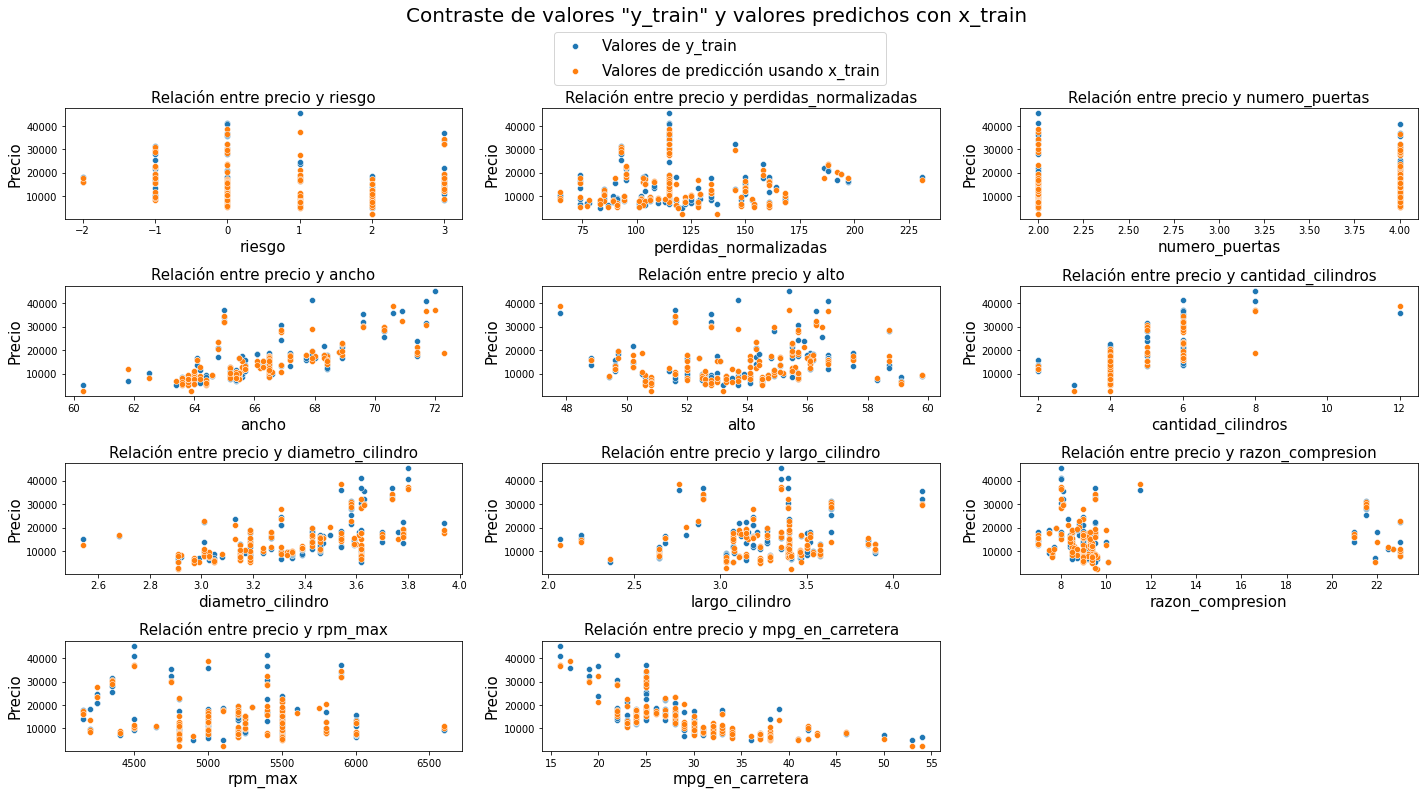

In [123]:
fig,axes= plt.subplots(nrows=4, ncols=3, figsize=(20,10))
axes=axes.flat


for j,columna in enumerate(columnas_numericas):
  
  G1=sns.scatterplot(x=x_train[columna],
                     y=y_train,
                     ax=axes[j])
  
  G2=sns.scatterplot(x=x_train[columna],
                     y=predicciones_x_train,
                     ax=axes[j])
  
  axes[j].set_xlabel(f'{columna}', fontsize=15)
  axes[j].set_ylabel('Precio',fontsize=15)
  axes[j].set_title(f'Relación entre precio y {columna}', fontsize=15)

titulo=fig.suptitle('Contraste de valores "y_train" y valores predichos con x_train',y=1.10,fontsize=20)

fig.legend(('Valores de y_train','Valores de predicción usando x_train'), 
           loc='upper center',
          prop={"size":15},
          bbox_to_anchor=(0,0,1,1.07))

plt.tight_layout()
fig.delaxes(axes[11])

In [124]:
predicciones=modelo_Ridge.predict(X=x_test)

from sklearn.metrics import mean_squared_error

rmse=mean_squared_error(y_true=y_test,
                        y_pred=predicciones,
                        squared=False)
rmse

2103.535720390829

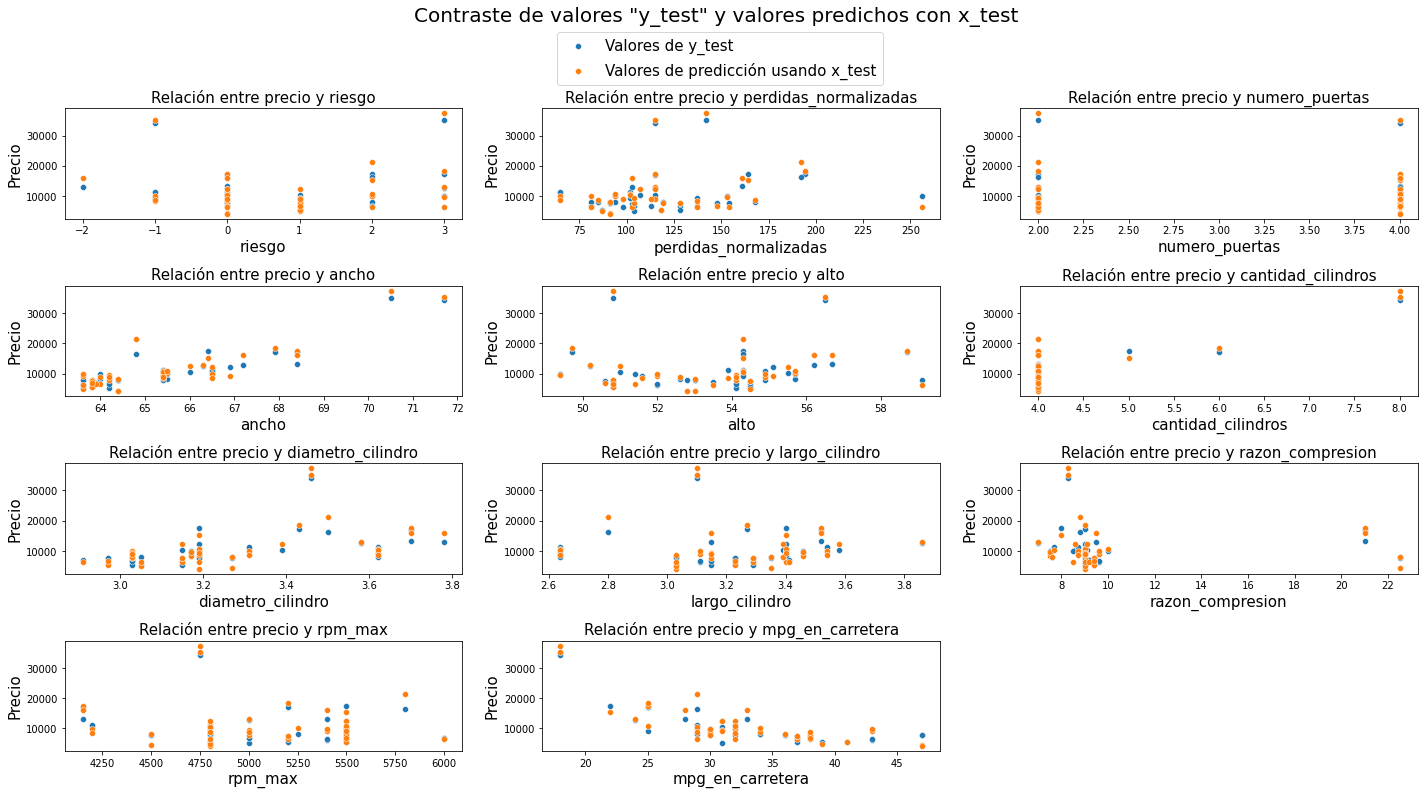

In [125]:
fig,axes= plt.subplots(nrows=4, ncols=3, figsize=(20,10))
axes=axes.flat


for j,columna in enumerate(columnas_numericas):
  
  G1=sns.scatterplot(x=x_test[columna],
                     y=y_test,
                     ax=axes[j])
  
  G2=sns.scatterplot(x=x_test[columna],
                     y=predicciones,
                     ax=axes[j])
  
  axes[j].set_xlabel(f'{columna}', fontsize=15)
  axes[j].set_ylabel('Precio',fontsize=15)
  axes[j].set_title(f'Relación entre precio y {columna}', fontsize=15)

titulo=fig.suptitle('Contraste de valores "y_test" y valores predichos con x_test',y=1.10,fontsize=20)

fig.legend(('Valores de y_test','Valores de predicción usando x_test'), 
           loc='upper center',
          prop={"size":15},
          bbox_to_anchor=(0,0,1,1.07))

plt.tight_layout()
fig.delaxes(axes[11])

### Modelo Random Forest

In [126]:
randomf=RandomForestRegressor()

In [127]:
pipa_pa_entrenar=Pipeline([
                           ('pipa_preprocesado',pipa_completa),
                           ('randomf',randomf)
])
pipa_pa_entrenar

Pipeline(steps=[('pipa_preprocesado',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipa_num',
                                                  Pipeline(steps=[('estandarizador',
                                                                   StandardScaler()),
                                                                  ('imputador_numerico',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('pca',
                                                                   PCA(n_components=0.9600000000000001,
                                                                       svd_solver='full'))]),
                                                  Index(['riesgo', 'perdidas_normalizadas', 'numero_puertas', 'ancho', 'alto',...
       'razon_compresion', 'rpm_max', 'mpg_en_carretera'],
      dtype='object')),
                                                 ('pipa_cat',
                                                  Pipeline(steps=[('imputador_categorico',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['marca', 'tipo_combustible', 'aspiracion', 'estilo_cuerpo', 'traccion',
       'posicion_motor', 'tipode_motor', 'sistema_combustible'],
      dtype='object'))])),
                ('randomf', RandomForestRegressor())])

In [128]:
modelo_random_forest=pipa_pa_entrenar.fit(X=x_train,
                                          y=y_train.fillna(value=y_train.median()))

In [129]:
predicciones_x_train=modelo_random_forest.predict(X=x_train)

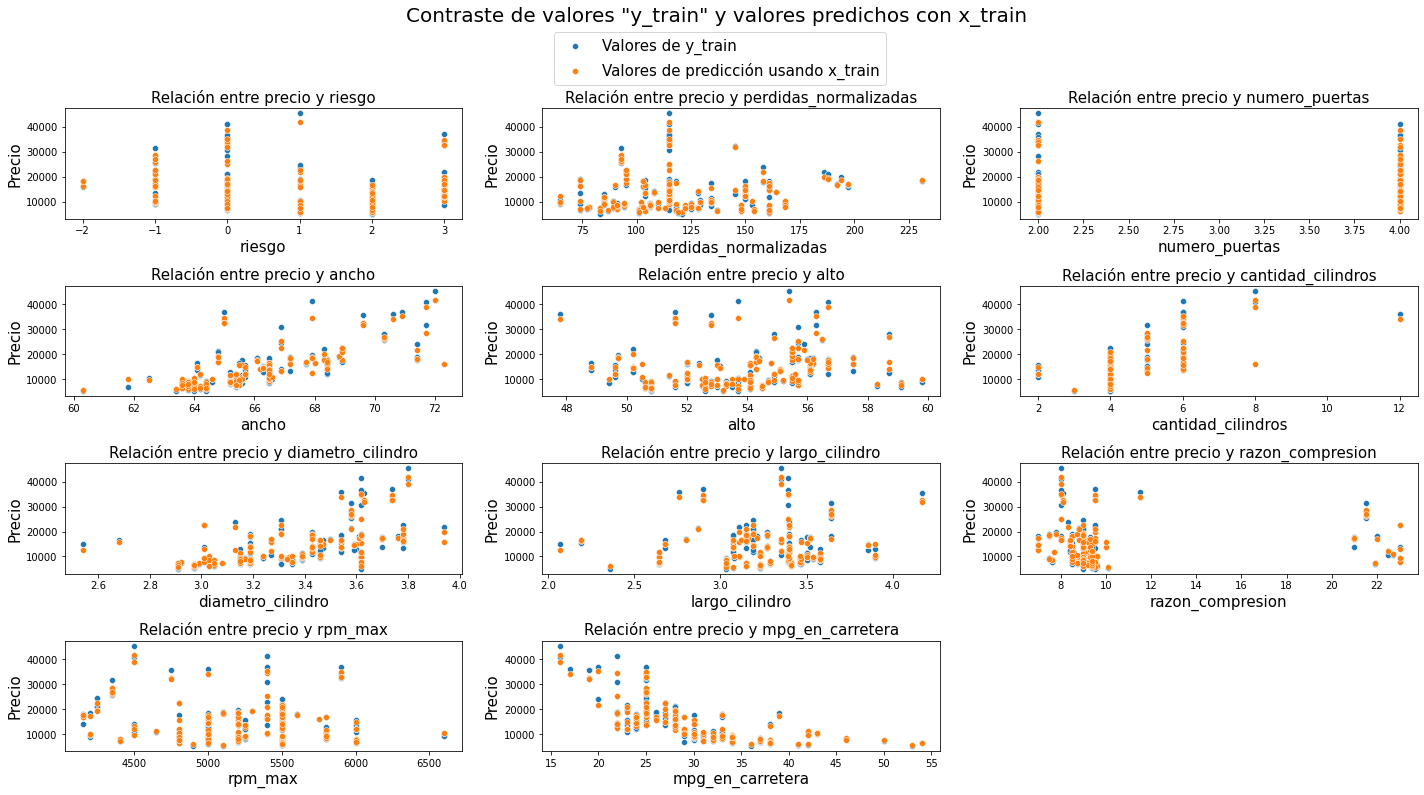

In [130]:
fig,axes= plt.subplots(nrows=4, ncols=3, figsize=(20,10))
axes=axes.flat


for j,columna in enumerate(columnas_numericas):
  
  G1=sns.scatterplot(x=x_train[columna],
                     y=y_train,
                     ax=axes[j])
  
  G2=sns.scatterplot(x=x_train[columna],
                     y=predicciones_x_train,
                     ax=axes[j])
  
  axes[j].set_xlabel(f'{columna}', fontsize=15)
  axes[j].set_ylabel('Precio',fontsize=15)
  axes[j].set_title(f'Relación entre precio y {columna}', fontsize=15)

titulo=fig.suptitle('Contraste de valores "y_train" y valores predichos con x_train',y=1.10,fontsize=20)

fig.legend(('Valores de y_train','Valores de predicción usando x_train'), 
           loc='upper center',
          prop={"size":15},
          bbox_to_anchor=(0,0,1,1.07))

plt.tight_layout()
fig.delaxes(axes[11])

In [131]:
from sklearn.metrics import mean_squared_error
predicciones=modelo_random_forest.predict(X=x_test)

rmse=mean_squared_error(y_true=y_test,
                        y_pred=predicciones,
                        squared=False)
rmse

1932.3147830878231

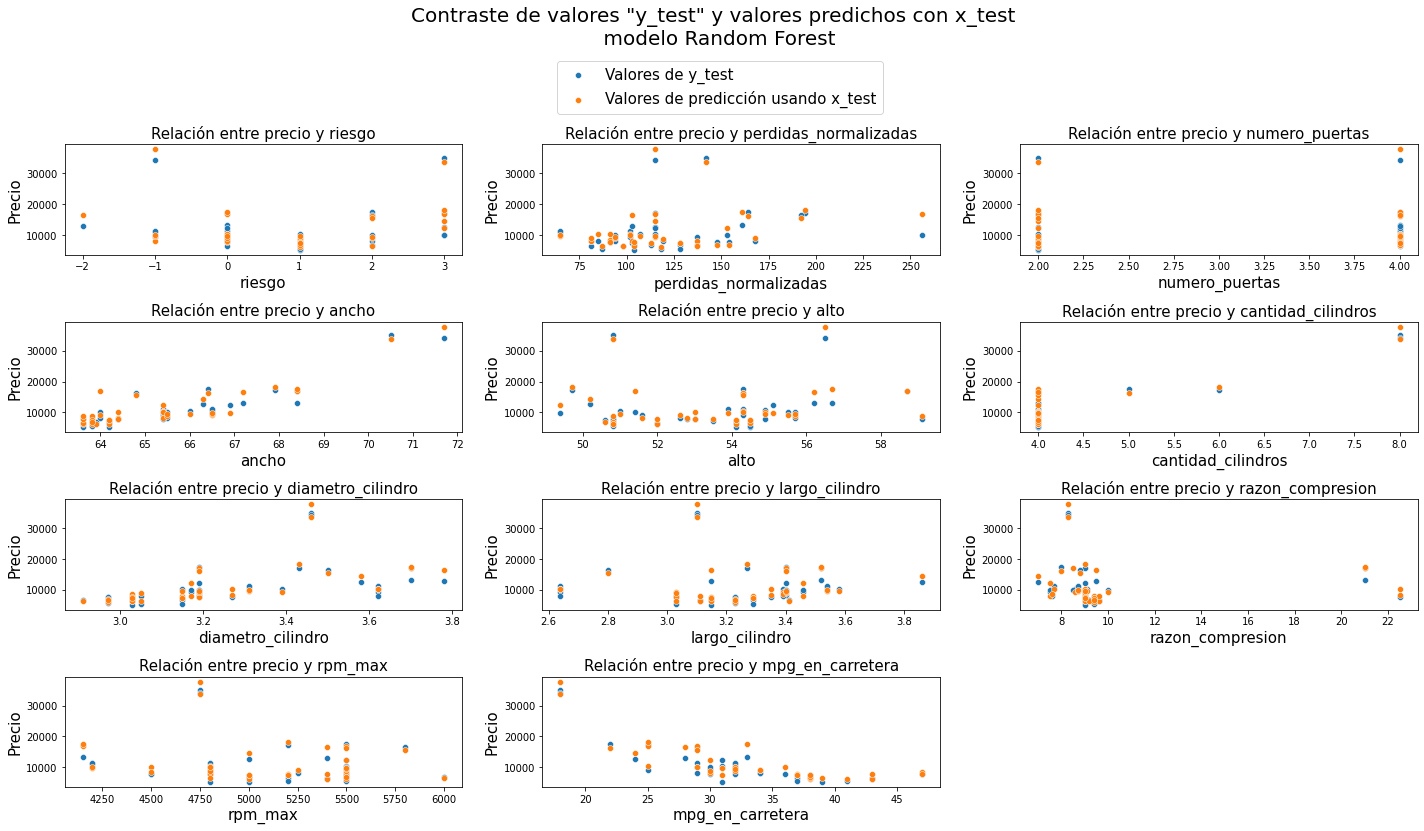

In [132]:
fig,axes= plt.subplots(nrows=4, ncols=3, figsize=(20,10))
axes=axes.flat


for j,columna in enumerate(columnas_numericas):
  
  G1=sns.scatterplot(x=x_test[columna],
                     y=y_test,
                     ax=axes[j])
  
  G2=sns.scatterplot(x=x_test[columna],
                     y=predicciones,
                     ax=axes[j])
  
  axes[j].set_xlabel(f'{columna}', fontsize=15)
  axes[j].set_ylabel('Precio',fontsize=15)
  axes[j].set_title(f'Relación entre precio y {columna}', fontsize=15)

titulo=fig.suptitle('Contraste de valores "y_test" y valores predichos con x_test \n modelo Random Forest',y=1.15,fontsize=20)

fig.legend(('Valores de y_test','Valores de predicción usando x_test'), 
           loc='upper center',
          prop={"size":15},
          bbox_to_anchor=(0,0,1,1.08))

plt.tight_layout()
fig.delaxes(axes[11])

Si bien la diferencia de rendimientos entre ellos es poca  define que el modelo a ocupar será el random forest puesto que consigue menor rmse (de 1953), además los promedios de los errores de todas las pruebas de validación realizadas concuerdan

# Optimización de hiperparámetros

## Grid Search

In [133]:
 from sklearn.model_selection import GridSearchCV, RepeatedKFold

Primero obtenemos los parámetros del modelo

In [134]:
pipa_pa_entrenar.get_params()

{'memory': None,
 'pipa_preprocesado': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipa_num',
                                  Pipeline(steps=[('estandarizador',
                                                   StandardScaler()),
                                                  ('imputador_numerico',
                                                   SimpleImputer(strategy='median')),
                                                  ('pca',
                                                   PCA(n_components=0.9600000000000001,
                                                       svd_solver='full'))]),
                                  Index(['riesgo', 'perdidas_normalizadas', 'numero_puertas', 'ancho', 'alto',
        'cantidad_cilindros', 'diametro_cilind...
        'razon_compresion', 'rpm_max', 'mpg_en_carretera'],
       dtype='object')),
                                 ('pipa_cat',
                                  Pipeline(steps=[('imputa

In [135]:
grid_de_parametros={"randomf__min_samples_split": np.array([1,2,3,4,5,6,7,9,10]),
                    "randomf__min_samples_leaf":np.array([1,2,3,4,5])}
cv=RepeatedKFold(n_splits=5, n_repeats=5)

In [136]:
grid=GridSearchCV(estimator=pipa_pa_entrenar,
                  param_grid=grid_de_parametros,
                  scoring="neg_root_mean_squared_error",
                  cv=cv,
                  verbose=0,
                  return_train_score=True
                  )

In [137]:
grid.fit(X=x_train, y=y_train.fillna(value=y_train.median()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [           nan -3771.85688206 -3829.79035694 -3792.34015622
 -3853.54136461 -3840.81038563 -3895.61989197 -3945.24884351
 -4057.39969396            nan -3885.68712181 -3876.74474
 -3875.78769703 -3874.39310802 -3908.33564704 -3936.68227016
 -4060.38969419 -4178.55345139            nan -4047.8761675
 -4050.83888878 -4042.4169947  -4011.06462568 -4007.57027653
 -4067.42804526 -4122.43400984 -4225.14251419            nan
 -4204.60237289 -4260.07682158 -4180.19676861 -4229.90234184
 -4214.98995876 -4253.11445197 -4238.65801186 -4290.53648412
            nan -4414.08785713 -4447.8555842  -4416.51731818
 -4447.98357993 -4441.96344707 -4434.36303822 -4401.16394272
 -4456.83140516]
  category=UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the train scores are non-finite: [           na

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('pipa_preprocesado',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipa_num',
                                                                         Pipeline(steps=[('estandarizador',
                                                                                          StandardScaler()),
                                                                                         ('imputador_numerico',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.9600000000000001,
                                                                                              svd_solver='...
                                                                         Index(['marca', 'tipo_combustible', 'aspiracion', 'estilo_cuerpo', 'traccion',
       'posicion_motor', 'tipode_motor', 'sistema_combustible'],
      dtype='object'))])),
                                       ('randomf', RandomForestRegressor())]),
             param_grid={'randomf__min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'randomf__min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  9, 10])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [138]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
 .drop(columns = 'params')\
 .sort_values('mean_test_score', ascending = False)

,param_randomf__min_samples_leaf,param_randomf__min_samples_split,mean_test_score,std_test_score,mean_train_score,std_train_score
1,1,2,-3771.856882,1017.054372,-1486.056312,120.871581
3,1,4,-3792.340156,1018.629880,-1642.101542,120.451127
2,1,3,-3829.790357,1051.255201,-1537.944165,118.812426
5,1,6,-3840.810386,1042.208193,-1890.853500,145.923390
4,1,5,-3853.541365,1049.176068,-1785.125994,131.937004
13,2,5,-3874.393108,1040.716876,-1912.963734,187.285824
12,2,4,-3875.787697,1071.634834,-1820.547544,138.179037
11,2,3,-3876.744740,1030.327722,-1804.840203,145.208277
10,2,2,-3885.687122,1032.255406,-1807.292255,144.656044
6,1,7,-3895.619892,1050.827980,-2028.571723,171.289279


De la optimización de 2 parámetros básicos que son la muestra minima para ser hoja o nodo, se consiguió que para ser hoja 1 muestra y para ser nodo 4 muestras son los mejores valores 

In [139]:
pipa_pa_entrenar.get_params()


{'memory': None,
 'pipa_preprocesado': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipa_num',
                                  Pipeline(steps=[('estandarizador',
                                                   StandardScaler()),
                                                  ('imputador_numerico',
                                                   SimpleImputer(strategy='median')),
                                                  ('pca',
                                                   PCA(n_components=0.9600000000000001,
                                                       svd_solver='full'))]),
                                  Index(['riesgo', 'perdidas_normalizadas', 'numero_puertas', 'ancho', 'alto',
        'cantidad_cilindros', 'diametro_cilind...
        'razon_compresion', 'rpm_max', 'mpg_en_carretera'],
       dtype='object')),
                                 ('pipa_cat',
                                  Pipeline(steps=[('imputa

In [144]:
pipa_pa_entrenar.set_params([randomf__min_samples_leaf=2])

SyntaxError: ignored

## Optimización Bayesiana 

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Integer

In [ ]:
parametros=[]

parametros['']

In [ ]:
BS= BayesSearchCV(estimator=pipa_pa_entrenar,)